Importing the Necessary Modules

In [1]:
import pandas as pd
from sqlalchemy import create_engine
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
import random
import json
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Connecting to the Database

In [2]:
db_username_0 = 'simulationuser'
db_password_0 = 'simulations2024'
db_host_0 = 'localhost'
db_port_0 = '5432'
db_name_0 = 'simulations_data'
table_name_0 = 'neutral_ensembles'

In [3]:
connection_string = f"postgresql://{db_username_0}:{db_password_0}@{db_host_0}:{db_port_0}/{db_name_0}"
engine = create_engine(connection_string)
query = f"SELECT * FROM {table_name_0}"
df = pd.read_sql(query, engine)
# df = df.iloc[:10000]

The DataFrame

In [4]:
len(df)

19548

In [5]:
df.head()

id       eps  n_0_squared  \
0   1  0.123943   318.864022   
1   2  0.123943   318.864022   
2   3  0.123943   318.864022   
3   4  0.123943   318.864022   
4   5  0.123943   318.864022   

                                               psi_e  \
0  [0.01901241359915969, 0.02094565213828948, 0.0...   
1  [-0.015306956055279406, -0.018598886033249096,...   
2  [-0.0043222238578132675, -0.006236032555439644...   
3  [0.0020231962839952003, 0.007689237656022573, ...   
4  [-0.003983910038470856, -0.004296501487265681,...   

                                                 b_e  \
0  [7.504182919637149, 5.242168510692357, 3.25751...   
1  [-22.73354115582673, -20.491230321386535, -18....   
2  [-1.3294619035737925, -0.3542331186883689, 0.7...   
3  [3.7691035403124657, 2.533415244777452, 0.5519...   
4  [2.788595648691494, 3.678930411410684, 4.39465...   

                                            psi_plus  \
0  [0.009100088897106815, 0.008170502473702008, 0...   
1  [-0.0029798340913627787, -0.002542041268612154...   
2  [0.0041149666638374185, 0.003760560668497042, ...   
3  [-0.004849477429635832, -0.004313470252298938,...   
4  [-0.0009258241146579647, -0.001288876586597915...   

                                              b_plus  \
0  [11.483256211928511, 12.305335670598128, 12.99...   
1  [-5.714632921245781, -5.906797736396248, -5.99...   
2  [4.406936470827708, 4.897727822971041, 5.27043...   
3  [-6.798482907141981, -7.553385448183479, -8.10...   
4  [5.64524711302219, 5.215129111766337, 4.683136...   

                                              u_list  \
0  [0.059856969573462815, 0.11815828270323876, 0....   
1  [0.013500907052391837, 0.02955175617868491, 0....   
2  [0.36158416491704687, 0.353768395661083, 0.345...   
3  [0.44400392226342283, 0.4349503791138216, 0.41...   
4  [0.4059526375568249, 0.40716358056633245, 0.40...   

                                              r_list  \
0  [5.8580779296291325, 5.794485878999542, 4.4154...   
1  [1.5443764706644225, 1.600817364258073, 1.2471...   
2  [-0.6022070478822698, -0.7940232690012407, -0....   
3  [-0.3322042754562684, -1.1230067013773166, -1....   
4  [0.12488499705764732, 0.18749882798590878, 0.1...   

                                      k_e_psi_e_list  \
0  [0.0003614718708655123, 0.00043872034349823065...   
1  [0.00023430290367825487, 0.0003459185616777883...   
2  [1.8681619077050206e-05, 3.88881020325031e-05,...   
3  [4.093323203571987e-06, 5.912437573079551e-05,...   
4  [1.5871539194628858e-05, 1.845992503007621e-05...   

                                        k_e_b_e_list  \
0  [56.312761291373924, 27.480330694494526, 10.61...   
1  [516.8138934836678, 419.8905200841109, 327.775...   
2  [1.767468953054052, 0.12548110237568802, 0.541...   
3  [14.206141497595963, 6.418192802470796, 0.3046...   
4  [7.776265691901133, 13.534528972002384, 19.312...   

                                   k_e_psi_plus_list  \
0  [8.281161793524673e-05, 6.675711067277063e-05,...   
1  [8.879411212047838e-06, 6.461973811327293e-06,...   
2  [1.6932950644493253e-05, 1.414181654144692e-05...   
3  [2.3517431340547354e-05, 1.860602561746786e-05...   
4  [8.571502912822041e-07, 1.6612028554802943e-06...   

                                     k_e_b_plus_list  \
0  [131.86517322879473, 151.42128596609467, 168.8...   
1  [32.657029424586085, 34.89025949869584, 35.959...   
2  [19.421089057911377, 23.987737827904656, 27.77...   
3  [46.21936983870168, 57.05363172882994, 65.6255...   
4  [31.868814967085374, 27.19757165239274, 21.931...   

                            heat_flux_psi_e_b_e_list  \
0  [0.14267262939189118, 0.10980063807525715, 0.0...   
1  [0.3479813154531256, 0.38111405742852644, 0.31...   
2  [0.005746231957680487, 0.0022090092603555835, ...   
3  [0.0076256362767533345, 0.019480031898484428, ...   
4  [-0.01110951419805819, -0.015806529984172948, ...   

                         heat_flux_psi_e_b_plus_list  \
0  [0.2183244165663046, 0.25774328040123345, 0.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19548 entries, 0 to 19547
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           19548 non-null  int64  
 1   eps                          19548 non-null  float64
 2   n_0_squared                  19548 non-null  float64
 3   psi_e                        19548 non-null  object 
 4   b_e                          19548 non-null  object 
 5   psi_plus                     19548 non-null  object 
 6   b_plus                       19548 non-null  object 
 7   u_list                       19548 non-null  object 
 8   r_list                       19548 non-null  object 
 9   k_e_psi_e_list               19548 non-null  object 
 10  k_e_b_e_list                 19548 non-null  object 
 11  k_e_psi_plus_list            19548 non-null  object 
 12  k_e_b_plus_list              19548 non-null  object 
 13  heat_flux_psi_e_

Verifying Details

In [4]:
def length_of_the_first_entry(series):
    return len(series.iloc[0])

selected_columns = df.iloc[:,3:]

lengths = selected_columns.apply(length_of_the_first_entry)
lengths

psi_e                          1000
b_e                            1000
psi_plus                       1000
b_plus                         1000
u_list                         1000
r_list                         1000
k_e_psi_e_list                 1000
k_e_b_e_list                   1000
k_e_psi_plus_list              1000
k_e_b_plus_list                1000
heat_flux_psi_e_b_e_list       1000
heat_flux_psi_e_b_plus_list    1000
b_e_psi_plus_list              1000
b_e_b_plus_list                1000
psi_plus_b_plus_list           1000
eta_list                       1000
dtype: int64

In [ ]:
# df.describe(include='all')

Defining Common Functions

In [5]:
def average_arrays(*arrays):
    if not arrays:
        raise ValueError("No arrays provided for averaging.")
    
    np_arrays = [np.array(arr) for arr in arrays]
    array_lengths = [len(arr) for arr in np_arrays]

    if len(set(array_lengths)) != 1:
        raise ValueError("All input arrays must have the same length.")
    
    average_array = np.mean(np_arrays, axis=0)
    
    return average_array

Composite Analysis of All the Data

In [6]:
average_psi_e = average_arrays(*list(df['psi_e']))
average_b_e = average_arrays(*list(df['b_e']))
average_psi_plus = average_arrays(*list(df['psi_plus']))
average_b_plus = average_arrays(*list(df['b_plus']))
average_U = average_arrays(*list(df['u_list']))
average_R = average_arrays(*list(df['r_list']))
average_k_e_psi_e_list = average_arrays(*list(df['k_e_psi_e_list']))
average_k_e_b_e_list = average_arrays(*list(df['k_e_b_e_list']))
average_k_e_psi_plus_list = average_arrays(*list(df['k_e_psi_plus_list']))
average_k_e_b_plus_list = average_arrays(*list(df['k_e_b_plus_list']))
average_heat_flux_psi_e_b_e_list = average_arrays(*list(df['heat_flux_psi_e_b_e_list']))
average_heat_flux_psi_e_b_plus_list = average_arrays(*list(df['heat_flux_psi_e_b_plus_list']))
average_b_e_psi_plus_list = average_arrays(*list(df['b_e_psi_plus_list']))
average_b_e_b_plus_list = average_arrays(*list(df['b_e_b_plus_list']))
average_psi_plus_b_plus_list = average_arrays(*list(df['psi_plus_b_plus_list']))
average_eta = average_arrays(*list(df['eta_list']))

In [7]:
window_size = 5000
dt = .001
epsilon = 0.12394270273516043
N_0_squared = 318.8640217310387

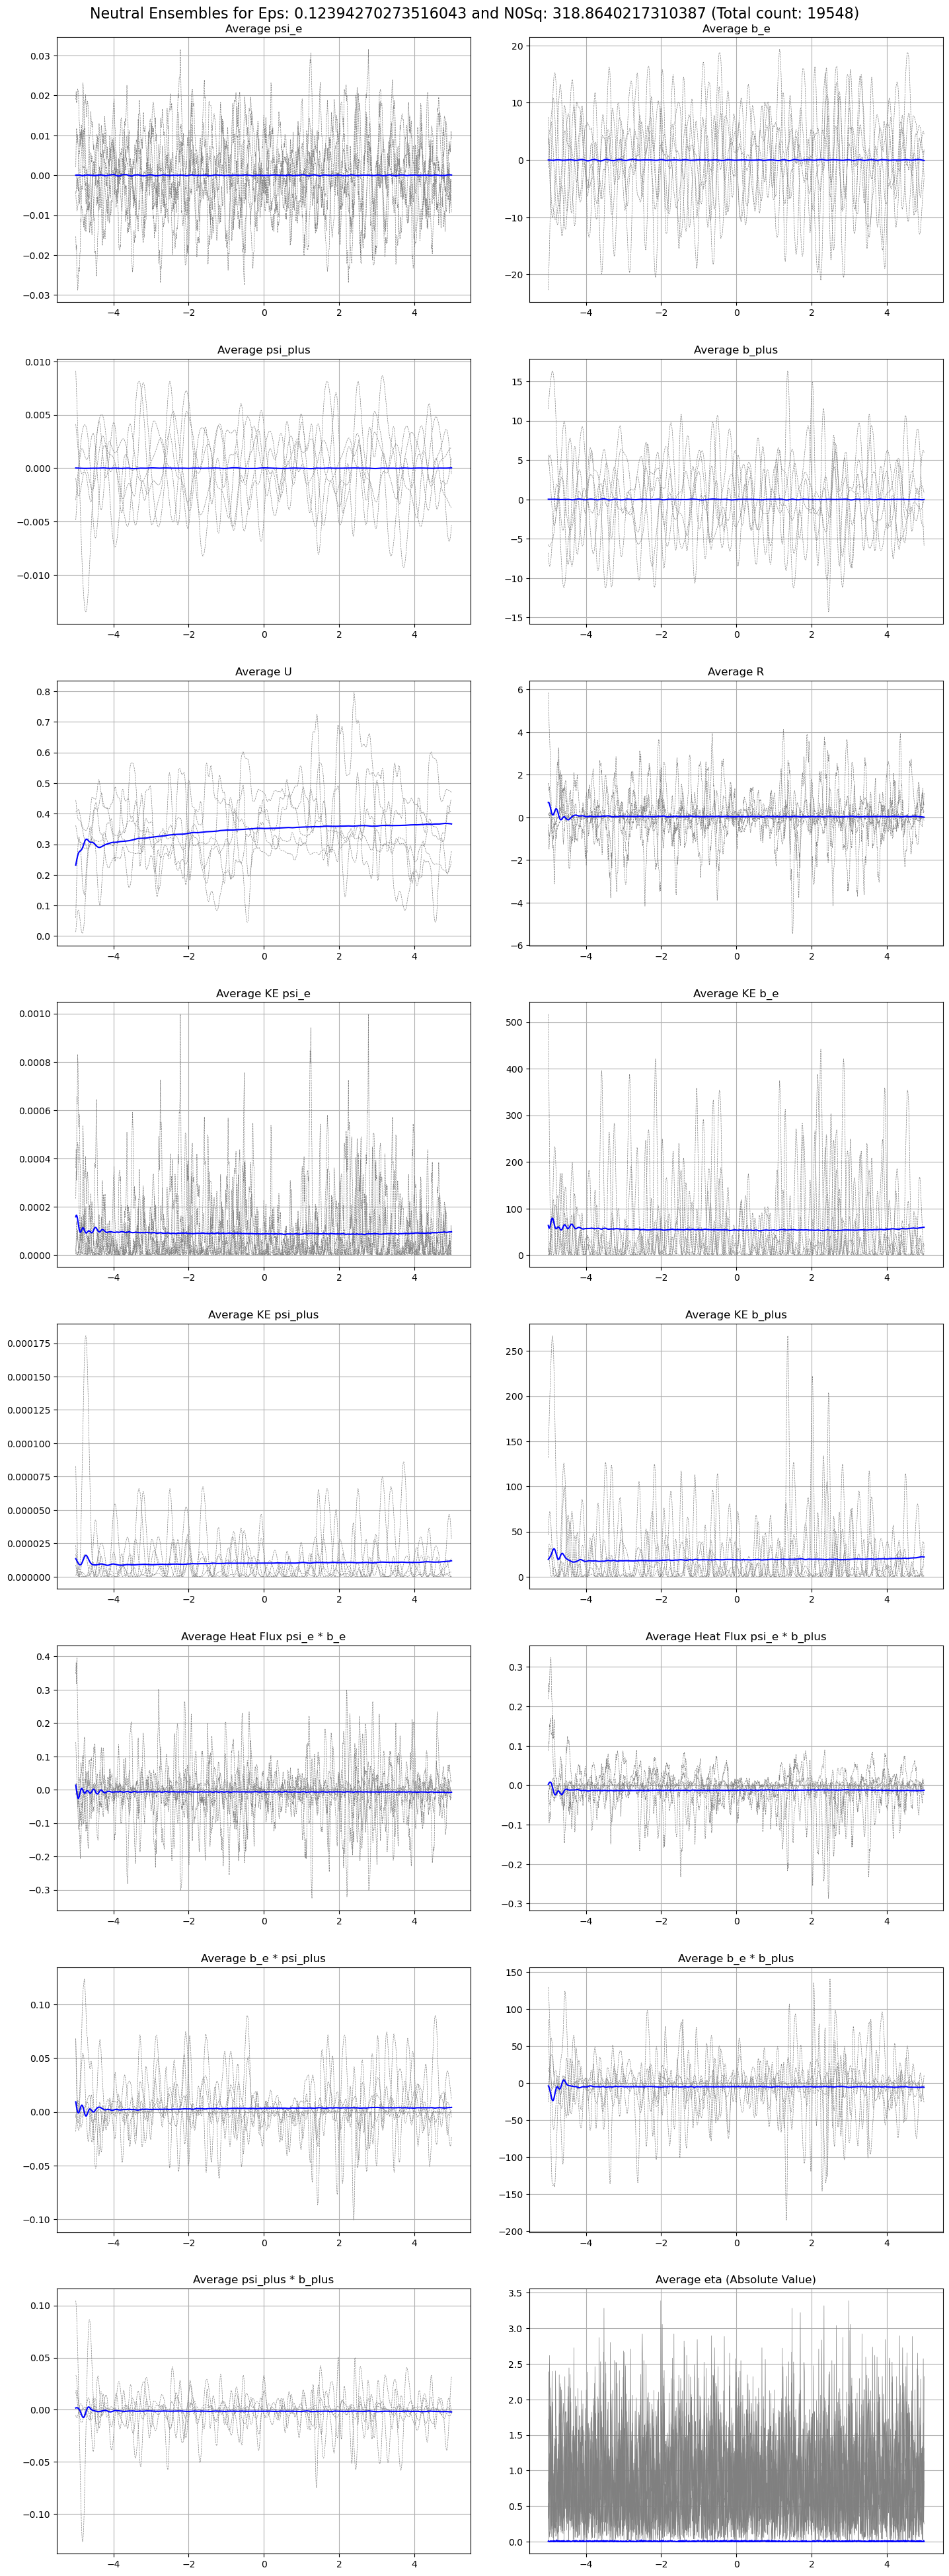

In [8]:
time_array = np.arange(-window_size/10, window_size/10) * dt * 10

fig, axs = plt.subplots(8, 2, figsize=(15, 40))

for i in range(5):
    axs[0, 0].plot(time_array, df['psi_e'][i], linewidth=0.5, linestyle='--', color='gray')
axs[0, 0].plot(time_array, average_psi_e, label='Average', linewidth=1.5, color='blue')
axs[0, 0].set_title(f'Average psi_e')
axs[0, 0].grid()


for i in range(5):
    axs[0, 1].plot(time_array, df['b_e'][i], linewidth=0.5, linestyle='--', color='gray')
axs[0, 1].plot(time_array, average_b_e, label='Average', linewidth=1.5, color='blue')
axs[0, 1].set_title(f'Average b_e')
axs[0, 1].grid()

for i in range(5):
    axs[1, 0].plot(time_array, df['psi_plus'][i],linewidth=0.5, linestyle='--', color='gray') 
axs[1, 0].plot(time_array, average_psi_plus, label='Average', linewidth=1.5, color='blue')
axs[1, 0].set_title(f'Average psi_plus')
axs[1, 0].grid()

for i in range(5):
    axs[1, 1].plot(time_array, df['b_plus'][i], linewidth=0.5, linestyle='--', color='gray')
axs[1, 1].plot(time_array, average_b_plus, label='Average', linewidth=1.5, color='blue')
axs[1, 1].set_title(f'Average b_plus')
axs[1, 1].grid()

for i in range(5):
    axs[2, 0].plot(time_array, df['u_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[2, 0].plot(time_array, average_U, label='Average', linewidth=1.5, color='blue')
axs[2, 0].set_title(f'Average U')
axs[2, 0].grid()

for i in range(5):
    axs[2, 1].plot(time_array, df['r_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[2, 1].plot(time_array, average_R, label='Average', linewidth=1.5, color='blue')
axs[2, 1].set_title(f'Average R')
axs[2, 1].grid()

for i in range(5):
    axs[3, 0].plot(time_array, df['k_e_psi_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[3, 0].plot(time_array, average_k_e_psi_e_list, label='Average', linewidth=1.5, color='blue')
axs[3, 0].set_title(f'Average KE psi_e')
axs[3, 0].grid()

for i in range(5):
    axs[3, 1].plot(time_array, df['k_e_b_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[3, 1].plot(time_array, average_k_e_b_e_list, label='Average', linewidth=1.5, color='blue')
axs[3, 1].set_title(f'Average KE b_e')
axs[3, 1].grid()

for i in range(5):
    axs[4, 0].plot(time_array, df['k_e_psi_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[4, 0].plot(time_array, average_k_e_psi_plus_list, label='Average', linewidth=1.5, color='blue')
axs[4, 0].set_title(f'Average KE psi_plus')
axs[4, 0].grid()

for i in range(5):
    axs[4, 1].plot(time_array, df['k_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[4, 1].plot(time_array, average_k_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[4, 1].set_title(f'Average KE b_plus')
axs[4, 1].grid()

for i in range(5):
    axs[5, 0].plot(time_array, df['heat_flux_psi_e_b_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[5, 0].plot(time_array, average_heat_flux_psi_e_b_e_list, label='Average', linewidth=1.5, color='blue')
axs[5, 0].set_title(f'Average Heat Flux psi_e * b_e')
axs[5, 0].grid()

for i in range(5):
    axs[5, 1].plot(time_array, df['heat_flux_psi_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[5, 1].plot(time_array, average_heat_flux_psi_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[5, 1].set_title(f'Average Heat Flux psi_e * b_plus')
axs[5, 1].grid()

for i in range(5):
    axs[6, 0].plot(time_array, df['b_e_psi_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[6, 0].plot(time_array, average_b_e_psi_plus_list, label='Average', linewidth=1.5, color='blue')
axs[6, 0].set_title(f'Average b_e * psi_plus')
axs[6, 0].grid()

for i in range(5):
    axs[6, 1].plot(time_array, df['b_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[6, 1].plot(time_array, average_b_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[6, 1].set_title(f'Average b_e * b_plus')
axs[6, 1].grid()

for i in range(5):
    axs[7, 0].plot(time_array, df['psi_plus_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[7, 0].plot(time_array, average_psi_plus_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[7, 0].set_title(f'Average psi_plus * b_plus')
axs[7, 0].grid()

average_eta = [[abs(i) for i in sublist] for sublist in average_eta]

for i in range(5): #Check if the average eta is the same using randn 
    axs[7, 1].plot(time_array, [abs(i[0]) for i in df['eta_list'][i]], linewidth=0.5, linestyle='-', label=f'eta_list {i}', color = 'gray')
axs[7, 1].plot(time_array, [abs(i[0]) for i in average_eta], label='Average', linewidth=1.5, color='blue')
axs[7, 1].set_title('Average eta (Absolute Value)')
axs[7, 1].grid()


plt.suptitle(f'Neutral Ensembles for Eps: {epsilon} and N0Sq: {N_0_squared} (Total count: {len(list(df['b_e']))})', fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.3, top=1.85)

plt.tight_layout(pad = 3)

plt.show()

In [9]:
#<U*k_e_psi_e>
temp_u_list = df['u_list'].apply(np.array)
temp_k_e_psi_e_list = df['k_e_psi_e_list'].apply(np.array)
UK_e_psi_e = np.array([i * j for i, j in zip(temp_u_list, temp_k_e_psi_e_list)])
average_UK_e_psi_e = average_arrays(*list(UK_e_psi_e))

In [10]:
#<U*k_e_psi_plus>
temp_u_list = df['u_list'].apply(np.array)
temp_k_e_psi_plus_list = df['k_e_psi_plus_list'].apply(np.array)
UK_e_psi_plus = np.array([i * j for i, j in zip(temp_u_list, temp_k_e_psi_plus_list)])
average_UK_e_psi_plus = average_arrays(*list(UK_e_psi_plus))

In [11]:
epsilon = 0.12394270273516043
N_0_squared = 318.8640217310387
r_m = 0.1
k = 2 * np.pi * 6
m = 2 * np.pi * 3
m_u = 2 * np.pi * 7
dt = 0.001
total_time = 200
k_e_square = k**2 + m**2
k_plus_square = k**2 + (m + m_u)**2

In [12]:
p = k / k_e_square
q = -k / k_plus_square
r = k * N_0_squared
s = -k * (k_plus_square - m_u**2) / (2*k_e_square)
t = -k * (m_u**2 - k_e_square) / (2 * k_plus_square)
v = k / 2

In [13]:
bigW = np.array([[-1, p, 0, 0], [-r, -1, 0, 0], [0, 0, -1, q], [0, 0, r, -1]])
bigL = np.array([[0, 0, s, 0], [0, 0, 0, v], [t, 0, 0, 0], [0, -v, 0, 0]])
bigQ = np.array([[8/k_e_square, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0]])

In [14]:
def create_C_matrix(row):
    length = len(row['k_e_psi_e_list'])  
    matrices = []
    
    for i in range(length):
        ke_psi_e = row['k_e_psi_e_list'][i]
        ke_b_e = row['k_e_b_e_list'][i]
        ke_psi_plus = row['k_e_psi_plus_list'][i]
        ke_b_plus = row['k_e_b_plus_list'][i]
        
        heat_flux_psi_e_b_e = row['heat_flux_psi_e_b_e_list'][i]
        heat_flux_psi_e_b_plus = row['heat_flux_psi_e_b_plus_list'][i]
        b_e_psi_plus = row['b_e_psi_plus_list'][i]
        b_e_b_plus = row['b_e_b_plus_list'][i]
        
        psi_plus_b_plus = row['psi_plus_b_plus_list'][i]
        psi_e_psi_plus = row['r_list'][i] 

        C_matrix = np.array([
            [ke_psi_e, heat_flux_psi_e_b_e, psi_e_psi_plus/(0.25 * k * (k_plus_square - k_e_square)), heat_flux_psi_e_b_plus],
            [heat_flux_psi_e_b_e, ke_b_e, b_e_psi_plus, b_e_b_plus],
            [psi_e_psi_plus/(0.25 * k * (k_plus_square - k_e_square)), b_e_psi_plus, ke_psi_plus, psi_plus_b_plus],
            [heat_flux_psi_e_b_plus, b_e_b_plus, psi_plus_b_plus, ke_b_plus]
        ])
        
        matrices.append(C_matrix)

    return matrices 

In [15]:
df['C_Matrix'] = df.apply(create_C_matrix, axis = 1)
df.head()

id       eps  n_0_squared  \
0   1  0.123943   318.864022   
1   2  0.123943   318.864022   
2   3  0.123943   318.864022   
3   4  0.123943   318.864022   
4   5  0.123943   318.864022   

                                               psi_e  \
0  [0.01901241359915969, 0.02094565213828948, 0.0...   
1  [-0.015306956055279406, -0.018598886033249096,...   
2  [-0.0043222238578132675, -0.006236032555439644...   
3  [0.0020231962839952003, 0.007689237656022573, ...   
4  [-0.003983910038470856, -0.004296501487265681,...   

                                                 b_e  \
0  [7.504182919637149, 5.242168510692357, 3.25751...   
1  [-22.73354115582673, -20.491230321386535, -18....   
2  [-1.3294619035737925, -0.3542331186883689, 0.7...   
3  [3.7691035403124657, 2.533415244777452, 0.5519...   
4  [2.788595648691494, 3.678930411410684, 4.39465...   

                                            psi_plus  \
0  [0.009100088897106815, 0.008170502473702008, 0...   
1  [-0.0029798340913627787, -0.002542041268612154...   
2  [0.0041149666638374185, 0.003760560668497042, ...   
3  [-0.004849477429635832, -0.004313470252298938,...   
4  [-0.0009258241146579647, -0.001288876586597915...   

                                              b_plus  \
0  [11.483256211928511, 12.305335670598128, 12.99...   
1  [-5.714632921245781, -5.906797736396248, -5.99...   
2  [4.406936470827708, 4.897727822971041, 5.27043...   
3  [-6.798482907141981, -7.553385448183479, -8.10...   
4  [5.64524711302219, 5.215129111766337, 4.683136...   

                                              u_list  \
0  [0.059856969573462815, 0.11815828270323876, 0....   
1  [0.013500907052391837, 0.02955175617868491, 0....   
2  [0.36158416491704687, 0.353768395661083, 0.345...   
3  [0.44400392226342283, 0.4349503791138216, 0.41...   
4  [0.4059526375568249, 0.40716358056633245, 0.40...   

                                              r_list  \
0  [5.8580779296291325, 5.794485878999542, 4.4154...   
1  [1.5443764706644225, 1.600817364258073, 1.2471...   
2  [-0.6022070478822698, -0.7940232690012407, -0....   
3  [-0.3322042754562684, -1.1230067013773166, -1....   
4  [0.12488499705764732, 0.18749882798590878, 0.1...   

                                      k_e_psi_e_list  \
0  [0.0003614718708655123, 0.00043872034349823065...   
1  [0.00023430290367825487, 0.0003459185616777883...   
2  [1.8681619077050206e-05, 3.88881020325031e-05,...   
3  [4.093323203571987e-06, 5.912437573079551e-05,...   
4  [1.5871539194628858e-05, 1.845992503007621e-05...   

                                        k_e_b_e_list  \
0  [56.312761291373924, 27.480330694494526, 10.61...   
1  [516.8138934836678, 419.8905200841109, 327.775...   
2  [1.767468953054052, 0.12548110237568802, 0.541...   
3  [14.206141497595963, 6.418192802470796, 0.3046...   
4  [7.776265691901133, 13.534528972002384, 19.312...   

                                   k_e_psi_plus_list  \
0  [8.281161793524673e-05, 6.675711067277063e-05,...   
1  [8.879411212047838e-06, 6.461973811327293e-06,...   
2  [1.6932950644493253e-05, 1.414181654144692e-05...   
3  [2.3517431340547354e-05, 1.860602561746786e-05...   
4  [8.571502912822041e-07, 1.6612028554802943e-06...   

                                     k_e_b_plus_list  \
0  [131.86517322879473, 151.42128596609467, 168.8...   
1  [32.657029424586085, 34.89025949869584, 35.959...   
2  [19.421089057911377, 23.987737827904656, 27.77...   
3  [46.21936983870168, 57.05363172882994, 65.6255...   
4  [31.868814967085374, 27.19757165239274, 21.931...   

                            heat_flux_psi_e_b_e_list  \
0  [0.14267262939189118, 0.10980063807525715, 0.0...   
1  [0.3479813154531256, 0.38111405742852644, 0.31...   
2  [0.005746231957680487, 0.0022090092603555835, ...   
3  [0.0076256362767533345, 0.019480031898484428, ...   
4  [-0.01110951419805819, -0.015806529984172948, ...   

                         heat_flux_psi_e_b_plus_list  \
0  [0.2183244165663046, 0.25774328040123345, 0.

In [16]:
C_Mat_Arr = df['C_Matrix']
C_Mat_Arr

0        [[[0.0003614718708655123, 0.14267262939189118,...
1        [[[0.00023430290367825487, 0.3479813154531256,...
2        [[[1.8681619077050206e-05, 0.00574623195768048...
3        [[[4.093323203571987e-06, 0.007625636276753334...
4        [[[1.5871539194628858e-05, -0.0111095141980581...
                               ...                        
19543    [[[8.801051215504544e-05, -0.06292548585577766...
19544    [[[0.00012329466940958877, 0.20325326168505758...
19545    [[[1.702722539849937e-05, 0.014356515145663691...
19546    [[[3.6979894147682114e-06, 0.00150752813336990...
19547    [[[0.00045290248777546735, 0.13734958371862685...
Name: C_Matrix, Length: 19548, dtype: object

In [ ]:
#<WC>

C_Mat_Arr_Multiplied = C_Mat_Arr.apply(lambda matrix_list: np.array([bigW @ matrix for matrix in matrix_list]))
C_Mat_Arr_Multiplied[0][0]

In [18]:
C_Mat_Arr_Multiplied.shape

(19548,)

In [21]:
len(C_Mat_Arr_Multiplied[0])

1000

In [22]:
C_Mat_Arr_Multiplied[0][0].shape

(4, 4)

In [19]:
type(C_Mat_Arr_Multiplied)

pandas.core.series.Series

In [ ]:
average_WC = np.mean(C_Mat_Arr_Multiplied.tolist(), axis = 0)
average_WC

In [ ]:
average_WC_term = np.mean(average_WC, axis=0)
average_WC_term

array([[-2.33647334e-04,  1.17959050e+00,  6.38975635e-05,
        -9.14070722e-02],
       [-1.09111590e+00,  2.53499478e+01, -2.00591978e-02,
         1.57358486e+02],
       [ 8.76371247e-05,  3.13636876e-02, -2.51611937e-07,
        -1.32584469e-01],
       [ 2.96638962e-02,  4.19014590e+01,  1.23992820e-01,
        -3.61106867e+01]])

In [ ]:
#<CW^T>
C_Mat_Arr_Multiplied = C_Mat_Arr.apply(lambda matrix_list: [matrix @ np.transpose(bigW) for matrix in matrix_list])
C_Mat_Arr_Multiplied[0][0]

array([[ 2.66613536e-03, -4.48788638e+00, -1.70598863e-03,
         1.86146578e+00],
       [ 1.05232128e+00, -1.77136480e+03, -6.73352211e-01,
         7.34718905e+02],
       [ 1.27611724e-03, -2.14807893e+00, -8.16553253e-04,
         8.90970732e-01],
       [ 1.61031188e+00, -2.71062634e+03, -1.03039545e+00,
         1.12430168e+03]])

In [ ]:
average_WC_Transpose = np.mean(C_Mat_Arr_Multiplied.tolist(), axis = 0)
average_WC_Transpose

array([[[ 1.47229189e-04, -1.92390314e+00, -2.88435792e-05,
          2.44978204e-01],
        [ 1.31718031e+00, -2.36133542e+02,  1.45769227e-02,
          1.13364715e+02],
        [ 1.73680792e-04, -2.55319093e-01, -2.35293986e-05,
          1.59669397e-01],
        [-7.28979912e-02, -1.09419688e+01, -1.36509873e-01,
         -1.89914820e+00]],

       [[-1.80172429e-05, -1.97750948e+00, -4.25205780e-05,
          2.42883278e-01],
        [ 1.23849795e+00, -1.41344532e+02,  2.10347482e-02,
          8.47212467e+01],
        [ 1.22115615e-04, -2.52743229e-01, -2.44078133e-05,
          1.53664321e-01],
        [-8.70189836e-02, -3.38041479e+01, -1.39764736e-01,
         -3.61856541e-03]],

       [[-1.99427717e-04, -1.99515775e+00, -5.39530219e-05,
          2.35057983e-01],
        [ 1.20305551e+00, -3.77422078e+01,  3.09992714e-02,
          5.84053529e+01],
        [ 7.42373201e-05, -2.44338470e-01, -2.46075699e-05,
          1.47527217e-01],
        [-1.11943410e-01, -5.31543703e+

In [ ]:
average_WC_Transpose_term = np.mean(average_WC_Transpose, axis=0)
average_WC_Transpose_term

array([[-2.33647334e-04, -1.09111590e+00,  8.76371247e-05,
         2.96638962e-02],
       [ 1.17959050e+00,  2.53499478e+01,  3.13636876e-02,
         4.19014590e+01],
       [ 6.38975635e-05, -2.00591978e-02, -2.51611937e-07,
         1.23992820e-01],
       [-9.14070722e-02,  1.57358486e+02, -1.32584469e-01,
        -3.61106867e+01]])

In [ ]:
#<ULC>
C_Mat_Arr_ULC_Multiplied = []

for idx, (matrix_list, u_list) in enumerate(zip(C_Mat_Arr, df['u_list'])):
    result = []
    for u, matrix in zip(u_list, matrix_list):
        uL = u * bigL  # Broadcast scalar u across the matrix L
        result_matrix = uL @ matrix  # Matrix multiplication
        result.append(result_matrix)
    C_Mat_Arr_ULC_Multiplied.append(result)

average_ULC = np.mean(C_Mat_Arr_ULC_Multiplied, axis = 0)
average_ULC

array([[[-3.23008367e-05, -1.13882224e-03, -9.99487008e-05,
          1.23452730e-02],
        [-6.78993998e-02, -2.10551205e+01, -6.38548603e-03,
          9.96550093e+01],
        [-1.27167298e-05,  5.64590001e-04, -4.91392039e-07,
          1.99704117e-03],
        [ 1.91960600e-02, -2.31689383e+02, -5.89045985e-04,
          2.10551205e+01]],

       [[-5.82096209e-05, -3.04486658e-03, -1.08669030e-04,
          9.59461797e-03],
        [-6.20124796e-02, -2.09970630e+01, -4.96273343e-03,
          1.03510273e+02],
        [-1.44653593e-05,  4.90616545e-04, -8.85541901e-07,
          1.82389646e-03],
        [ 1.66809625e-02, -2.39018832e+02, -1.57493099e-03,
          2.09970630e+01]],

       [[-8.33552370e-05,  1.54843939e-04, -1.16274238e-04,
          6.38202461e-03],
        [-5.43807620e-02, -2.18352146e+01, -3.30104721e-03,
          1.07449848e+02],
        [-1.61692266e-05,  7.24786942e-04, -1.26808170e-06,
          1.59943418e-03],
        [ 2.46427560e-02, -2.44993287e+

In [ ]:
average_ULC_term = np.mean(average_ULC, axis=0)
average_ULC_term

array([[-1.80426049e-05,  9.86988260e-03, -1.39583809e-04,
         2.20677834e-02],
       [-1.11157406e-01, -3.41662310e+01, -1.14143707e-02,
         1.48023970e+02],
       [-1.74368501e-05,  1.34024163e-03, -2.74481819e-07,
         3.26933546e-03],
       [ 4.55682155e-02, -3.46939270e+02,  5.10511169e-03,
         3.41662310e+01]])

In [ ]:
#<UCL^T>
C_Mat_Arr_UCLT_Multiplied = []

L_transposed = bigL.T

for idx, (matrix_list, u_list) in enumerate(zip(C_Mat_Arr, df['u_list'])):
    result = []
    for u, matrix in zip(u_list, matrix_list):
        uC = u * matrix  # Multiply the scalar u with the matrix C
        result_matrix = uC @ L_transposed  # Multiply by the transposed matrix L
        result.append(result_matrix)
    C_Mat_Arr_UCLT_Multiplied.append(result)

average_UCLT = np.mean(C_Mat_Arr_UCLT_Multiplied, axis = 0)
average_UCLT
average_UCLT_term = np.mean(average_UCLT, axis=0)
average_UCLT_term

array([[-1.80426049e-05, -1.11157406e-01, -1.74368501e-05,
         4.55682155e-02],
       [ 9.86988260e-03, -3.41662310e+01,  1.34024163e-03,
        -3.46939270e+02],
       [-1.39583809e-04, -1.14143707e-02, -2.74481819e-07,
         5.10511169e-03],
       [ 2.20677834e-02,  1.48023970e+02,  3.26933546e-03,
         3.41662310e+01]])

In [ ]:
average_C_Matrix = np.mean(df['C_Matrix'].tolist(), axis = 0)
average_C_Matrix

array([[[ 1.58846773e-04,  1.44234899e-02,  2.04784790e-05,
          1.19134808e-03],
        [ 1.44234899e-02,  6.27503510e+01,  9.14954011e-03,
         -3.37909595e+00],
        [ 2.04784790e-05,  9.14954011e-03,  1.34026377e-05,
          1.44224182e-03],
        [ 1.19134808e-03, -3.37909595e+00,  1.44224182e-03,
          1.92361791e+01]],

       [[ 1.63934055e-04,  6.87616779e-03,  2.04663883e-05,
          3.14093271e-03],
        [ 6.87616779e-03,  5.86868727e+01,  6.71901863e-03,
         -3.95266003e+00],
        [ 2.04663883e-05,  6.71901863e-03,  1.29192188e-05,
          1.63619261e-03],
        [ 3.14093271e-03, -3.95266003e+00,  1.63619261e-03,
          1.96721106e+01]],

       [[ 1.66104838e-04, -1.57030370e-03,  1.99568970e-05,
          4.84168959e-03],
        [-1.57030370e-03,  5.66186564e+01,  4.43879791e-03,
         -5.04704968e+00],
        [ 1.99568970e-05,  4.43879791e-03,  1.24169990e-05,
          1.73616728e-03],
        [ 4.84168959e-03, -5.04704968e+

In [ ]:
average_C_matrix = np.array(average_C_Matrix)

# Time step (assuming it's constant)
delta_t = .01  # Replace with your actual time step

# Initialize an array to store the time derivatives
dC_dt = np.zeros_like(average_C_matrix)

# Forward difference for the first time point
dC_dt[0] = (average_C_matrix[1] - average_C_matrix[0]) / delta_t

# Central difference for the intermediate points
for i in range(1, len(average_C_matrix) - 1):
    dC_dt[i] = (average_C_matrix[i + 1] - average_C_matrix[i - 1]) / (2 * delta_t)

# Backward difference for the last time point
dC_dt[-1] = (average_C_matrix[-1] - average_C_matrix[-2]) / delta_t
dC_dt.shape

(1000, 4, 4)

In [ ]:
average_C_matrix.shape

(1000, 4, 4)

In [ ]:
s1 = average_WC + average_WC_Transpose + average_ULC + average_UCLT + epsilon*bigQ
s1

array([[[ 7.87990986e-04, -6.75761044e-01,  3.21717826e-05,
          2.03621546e-01],
        [-6.75761044e-01, -5.14377326e+02, -2.46563066e-01,
         -2.96116275e+01],
        [ 3.21717826e-05, -2.46563066e-01, -4.80415813e-05,
          2.45675187e-02],
        [ 2.03621546e-01, -2.96116275e+01,  2.45675187e-02,
          3.83119446e+01]],

       [[ 4.05680554e-04, -8.04068880e-01, -4.35393522e-05,
          1.82139875e-01],
        [-8.04068880e-01, -3.24683190e+02, -2.36180598e-01,
         -8.45914598e+01],
        [-4.35393522e-05, -2.36180598e-01, -5.05867104e-05,
          1.41485512e-02],
        [ 1.82139875e-01, -8.45914598e+01,  1.41485512e-02,
          4.19868888e+01]],

       [[-7.43162621e-06, -8.46328156e-01, -1.12159167e-04,
          1.54139353e-01],
        [-8.46328156e-01, -1.19154845e+02, -2.15915459e-01,
         -1.32292457e+02],
        [-1.12159167e-04, -2.15915459e-01, -5.17513031e-05,
          6.05641336e-03],
        [ 1.54139353e-01, -1.32292457e+

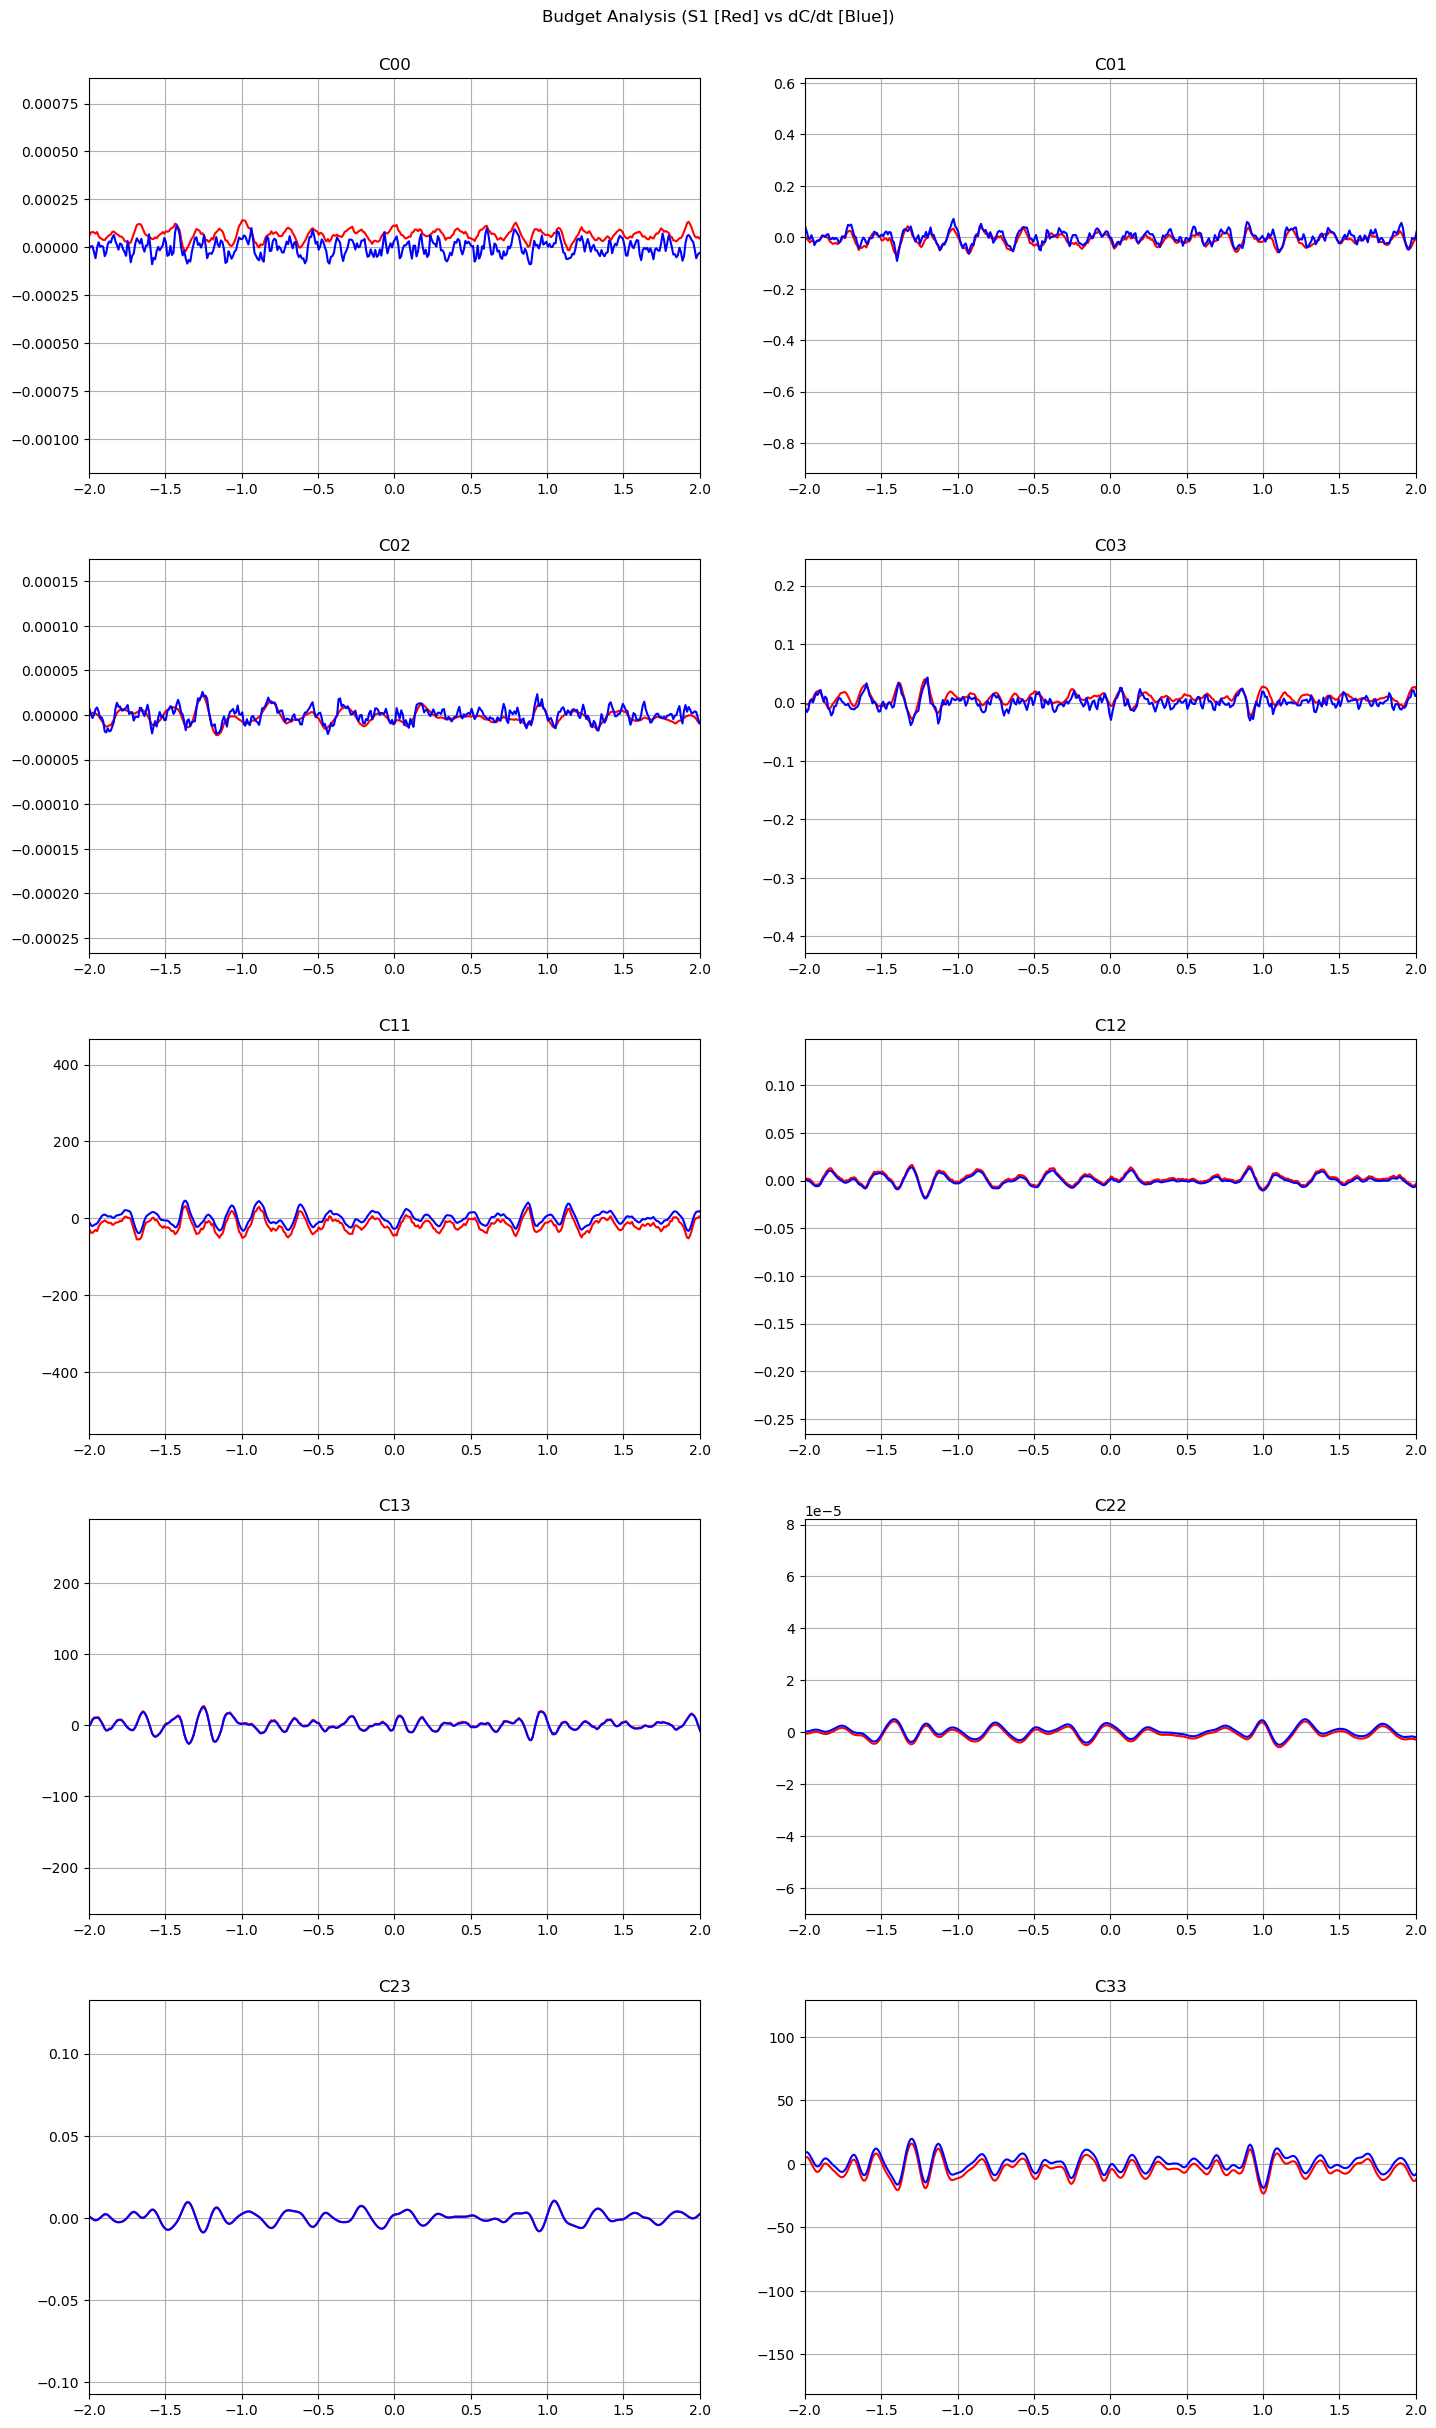

In [ ]:
time_array = np.linspace(-5, 5,  int(10/.01))
# time_array = np.arange(2000/10, 2000/10) * dt * 10
#fig, axs = plt.subplots(1,1, figsize = (8, 12))
x_limit = (-2, 2)

fig, axs = plt.subplots(5, 2, figsize=(15, 25))


axs[0, 0].plot(time_array, s1[:, 0, 0],'r')
axs[0, 0].plot(time_array, dC_dt[:, 0, 0],'b')
axs[0, 0].set_title(f'C00')
axs[0, 0].set_xlim(x_limit)
axs[0, 0].grid()

axs[0, 1].plot(time_array, s1[:, 0, 1],'r')
axs[0, 1].plot(time_array, dC_dt[:, 0, 1],'b')
axs[0, 1].set_title(f'C01')
axs[0, 1].set_xlim(x_limit)
axs[0, 1].grid()

axs[1, 0].plot(time_array, s1[:, 0, 2],'r')
axs[1, 0].plot(time_array, dC_dt[:, 0, 2],'b')
axs[1, 0].set_title(f'C02')
axs[1, 0].set_xlim(x_limit)
axs[1, 0].grid()

axs[1, 1].plot(time_array, s1[:, 0, 3],'r')
axs[1, 1].plot(time_array, dC_dt[:, 0, 3],'b')
axs[1, 1].set_title(f'C03')
axs[1, 1].set_xlim(x_limit)
axs[1, 1].grid()

axs[2, 0].plot(time_array, s1[:, 1, 1],'r')
axs[2, 0].plot(time_array, dC_dt[:, 1, 1],'b')
axs[2, 0].set_title(f'C11')
axs[2, 0].set_xlim(x_limit)
axs[2, 0].grid()

axs[2, 1].plot(time_array, s1[:, 1, 2],'r')
axs[2, 1].plot(time_array, dC_dt[:, 1, 2],'b')
axs[2, 1].set_title(f'C12')
axs[2, 1].set_xlim(x_limit)
axs[2, 1].grid()

axs[3, 0].plot(time_array, s1[:, 1, 3],'r')
axs[3, 0].plot(time_array, dC_dt[:, 1, 3],'b')
axs[3, 0].set_title(f'C13')
axs[3, 0].set_xlim(x_limit)
axs[3, 0].grid()

axs[3, 1].plot(time_array, s1[:, 2, 2],'r')
axs[3, 1].plot(time_array, dC_dt[:, 2, 2],'b')
axs[3, 1].set_title(f'C22')
axs[3, 1].set_xlim(x_limit)
axs[3, 1].grid()

axs[4, 0].plot(time_array, s1[:, 2, 3],'r')
axs[4, 0].plot(time_array, dC_dt[:, 2, 3],'b')
axs[4, 0].set_title(f'C23')
axs[4, 0].set_xlim(x_limit)
axs[4, 0].grid()

axs[4, 1].plot(time_array, s1[:, 3, 3],'r')
axs[4, 1].plot(time_array, dC_dt[:, 3, 3],'b')
axs[4, 1].set_title(f'C33')
axs[4, 1].set_xlim(x_limit)
axs[4, 1].grid()


plt.suptitle(f"Budget Analysis (S1 [Red] vs dC/dt [Blue])")



#plt.subplots_adjust(wspace=.4)
#plt.subplots_adjust(hspace=.4)
plt.tight_layout(pad = 3)
plt.show()

In [ ]:
#W<C> term
W_C = np.array([bigW @ C for C in average_C_Matrix])
W_C

#<C>W^T
CW_T = np.array([C @ bigW.T for C in average_C_Matrix])
CW_T

U = np.mean(average_U)
U

#<U>L<C>
result_ULC = np.array([U * (bigL @ C) for C in average_C_Matrix])
result_ULC

#<U><C>L^T 
result_UCLT = np.array([U * (C @ bigL.T) for C in average_C_Matrix])
result_UCLT

s2 = W_C + CW_T + result_ULC + result_UCLT + epsilon*bigQ
s2

array([[[ 3.41536541e-04, -7.13200658e-01, -5.25525436e-05,
          6.09937709e-02],
        [-7.13200658e-01, -5.15884977e+02, -2.34171780e-01,
         -1.78421081e+02],
        [-5.25525436e-05, -2.34171780e-01, -5.48334846e-05,
         -3.61184639e-02],
        [ 6.09937709e-02, -1.78421081e+02, -3.61184639e-02,
          3.98195962e+01]],

       [[ 1.13454113e-05, -8.02578838e-01, -1.12728374e-04,
          9.10687568e-02],
        [-8.02578838e-01, -3.33710611e+02, -2.22453642e-01,
         -2.00887190e+02],
        [-1.12728374e-04, -2.22453642e-01, -5.65857238e-05,
         -3.00617097e-02],
        [ 9.10687568e-02, -2.00887190e+02, -3.00617097e-02,
          5.10143093e+01]],

       [[-3.38760793e-04, -8.16240399e-01, -1.66184543e-04,
          1.11585742e-01],
        [-8.16240399e-01, -1.40632513e+02, -2.01835757e-01,
         -2.30184795e+02],
        [-1.66184543e-04, -2.01835757e-01, -5.67918077e-05,
         -2.51905348e-02],
        [ 1.11585742e-01, -2.30184795e+

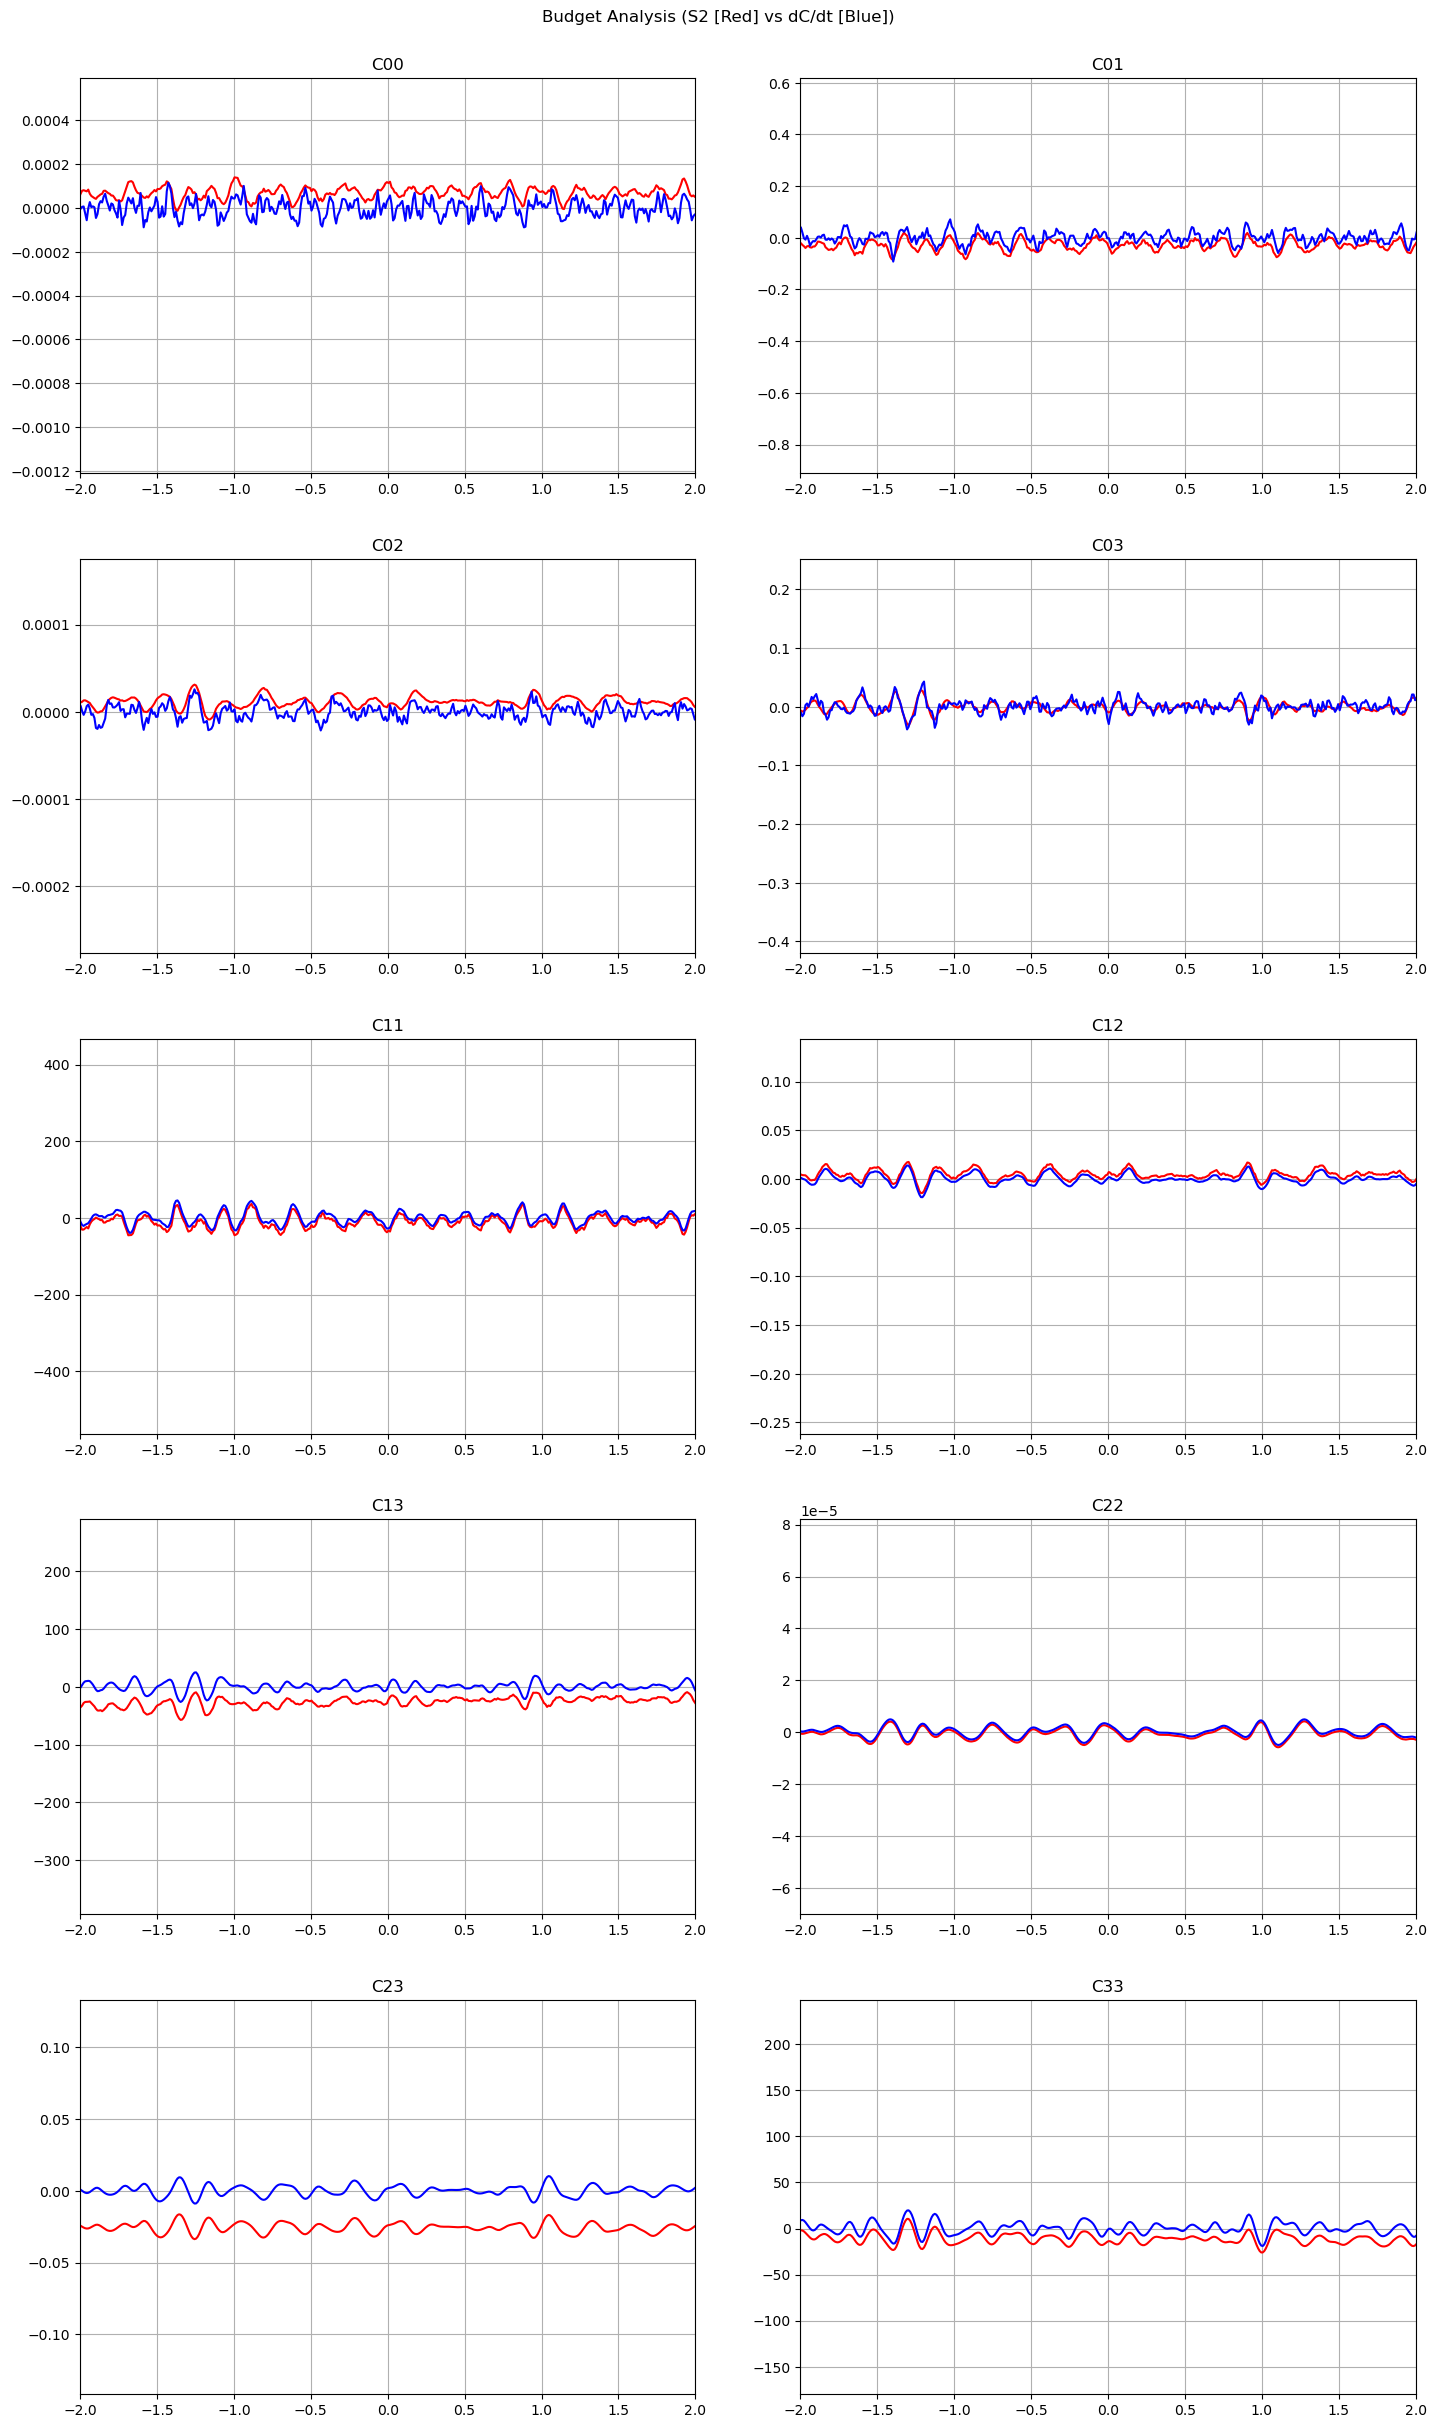

In [ ]:
time_array = np.linspace(-5, 5, int(10/.01))
# time_array = np.arange(2000/10, 2000/10) * dt * 10
#fig, axs = plt.subplots(1,1, figsize = (8, 12))
x_limit = (-2, 2)

fig, axs = plt.subplots(5, 2, figsize=(15, 25))


axs[0, 0].plot(time_array, s2[:, 0, 0],'r')
axs[0, 0].plot(time_array, dC_dt[:, 0, 0],'b')
axs[0, 0].set_title(f'C00')
axs[0, 0].set_xlim(x_limit)
axs[0, 0].grid()

axs[0, 1].plot(time_array, s2[:, 0, 1],'r')
axs[0, 1].plot(time_array, dC_dt[:, 0, 1],'b')
axs[0, 1].set_title(f'C01')
axs[0, 1].set_xlim(x_limit)
axs[0, 1].grid()

axs[1, 0].plot(time_array, s2[:, 0, 2],'r')
axs[1, 0].plot(time_array, dC_dt[:, 0, 2],'b')
axs[1, 0].set_title(f'C02')
axs[1, 0].set_xlim(x_limit)
axs[1, 0].grid()

axs[1, 1].plot(time_array, s2[:, 0, 3],'r')
axs[1, 1].plot(time_array, dC_dt[:, 0, 3],'b')
axs[1, 1].set_title(f'C03')
axs[1, 1].set_xlim(x_limit)
axs[1, 1].grid()

axs[2, 0].plot(time_array, s2[:, 1, 1],'r')
axs[2, 0].plot(time_array, dC_dt[:, 1, 1],'b')
axs[2, 0].set_title(f'C11')
axs[2, 0].set_xlim(x_limit)
axs[2, 0].grid()

axs[2, 1].plot(time_array, s2[:, 1, 2],'r')
axs[2, 1].plot(time_array, dC_dt[:, 1, 2],'b')
axs[2, 1].set_title(f'C12')
axs[2, 1].set_xlim(x_limit)
axs[2, 1].grid()

axs[3, 0].plot(time_array, s2[:, 1, 3],'r')
axs[3, 0].plot(time_array, dC_dt[:, 1, 3],'b')
axs[3, 0].set_title(f'C13')
axs[3, 0].set_xlim(x_limit)
axs[3, 0].grid()

axs[3, 1].plot(time_array, s2[:, 2, 2],'r')
axs[3, 1].plot(time_array, dC_dt[:, 2, 2],'b')
axs[3, 1].set_title(f'C22')
axs[3, 1].set_xlim(x_limit)
axs[3, 1].grid()

axs[4, 0].plot(time_array, s2[:, 2, 3],'r')
axs[4, 0].plot(time_array, dC_dt[:, 2, 3],'b')
axs[4, 0].set_title(f'C23')
axs[4, 0].set_xlim(x_limit)
axs[4, 0].grid()

axs[4, 1].plot(time_array, s2[:, 3, 3],'r')
axs[4, 1].plot(time_array, dC_dt[:, 3, 3],'b')
axs[4, 1].set_title(f'C33')
axs[4, 1].set_xlim(x_limit)
axs[4, 1].grid()


plt.suptitle(f"Budget Analysis (S2 [Red] vs dC/dt [Blue])")



#plt.subplots_adjust(wspace=.4)
#plt.subplots_adjust(hspace=.4)
plt.tight_layout(pad = 3)
plt.show()

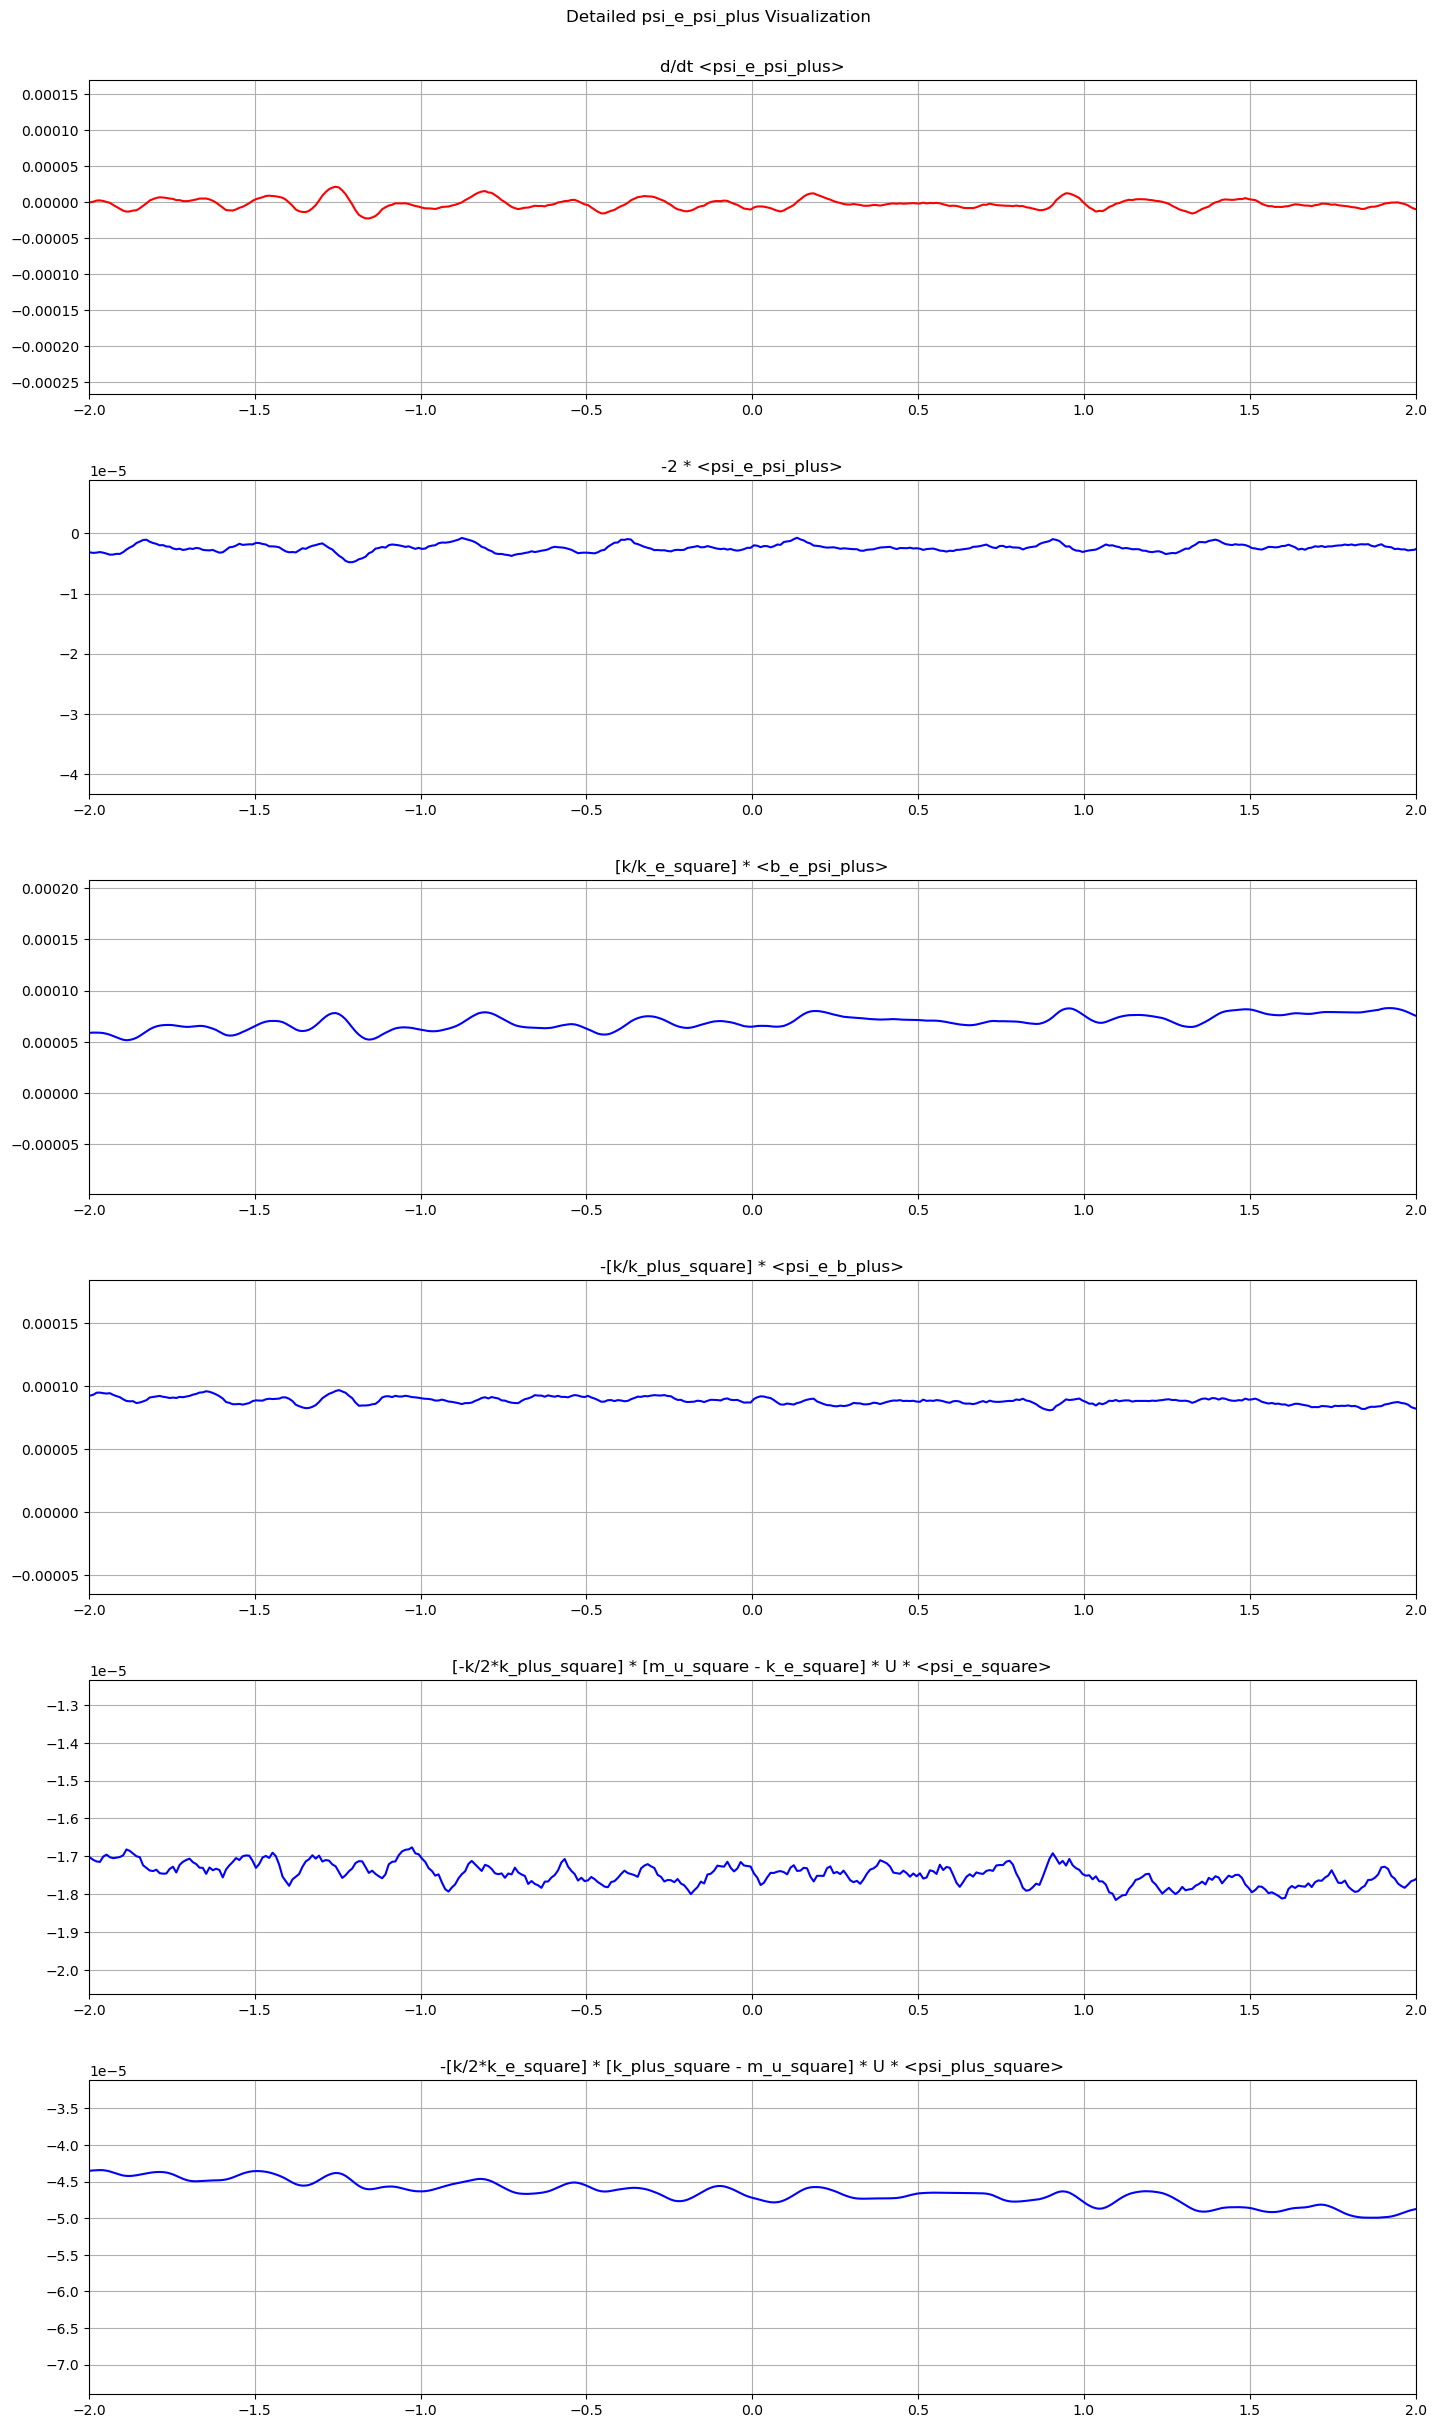

In [ ]:
time_array = np.linspace(-5, 5, int(10/.01))
# time_array = np.arange(2000/10, 2000/10) * dt * 10
#fig, axs = plt.subplots(1,1, figsize = (8, 12))
x_limit = (-2, 2)

fig, axs = plt.subplots(6, 1, figsize=(15, 25))


axs[0].plot(time_array, s1[:, 0, 2],'r')
axs[0].set_title(f'd/dt <psi_e_psi_plus>')
axs[0].set_xlim(x_limit)
axs[0].grid()

axs[1].plot(time_array, -2 * average_R/(0.25 * k * (k_plus_square - k_e_square)),'b')
axs[1].set_title(f'-2 * <psi_e_psi_plus>')
axs[1].set_xlim(x_limit)
axs[1].grid()

axs[2].plot(time_array, (k/k_e_square) * average_b_e_psi_plus_list,'b')
axs[2].set_title(f'[k/k_e_square] * <b_e_psi_plus>')
axs[2].set_xlim(x_limit)
axs[2].grid()

axs[3].plot(time_array, (-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list,'b')
axs[3].set_title(f'-[k/k_plus_square] * <psi_e_b_plus>')
axs[3].set_xlim(x_limit)
axs[3].grid()

axs[4].plot(time_array, (-k/(2*k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e),'b')
axs[4].set_title(f'[-k/2*k_plus_square] * [m_u_square - k_e_square] * U * <psi_e_square>')
axs[4].set_xlim(x_limit) 
axs[4].grid()

axs[5].plot(time_array, (-k/(2*k_plus_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus),'b')
axs[5].set_title(f'-[k/2*k_e_square] * [k_plus_square - m_u_square] * U * <psi_plus_square>')
axs[5].set_xlim(x_limit)
axs[5].grid()


plt.suptitle(f"Detailed psi_e_psi_plus Visualization")



#plt.subplots_adjust(wspace=.4)
#plt.subplots_adjust(hspace=.4)
plt.tight_layout(pad = 3)
plt.show()

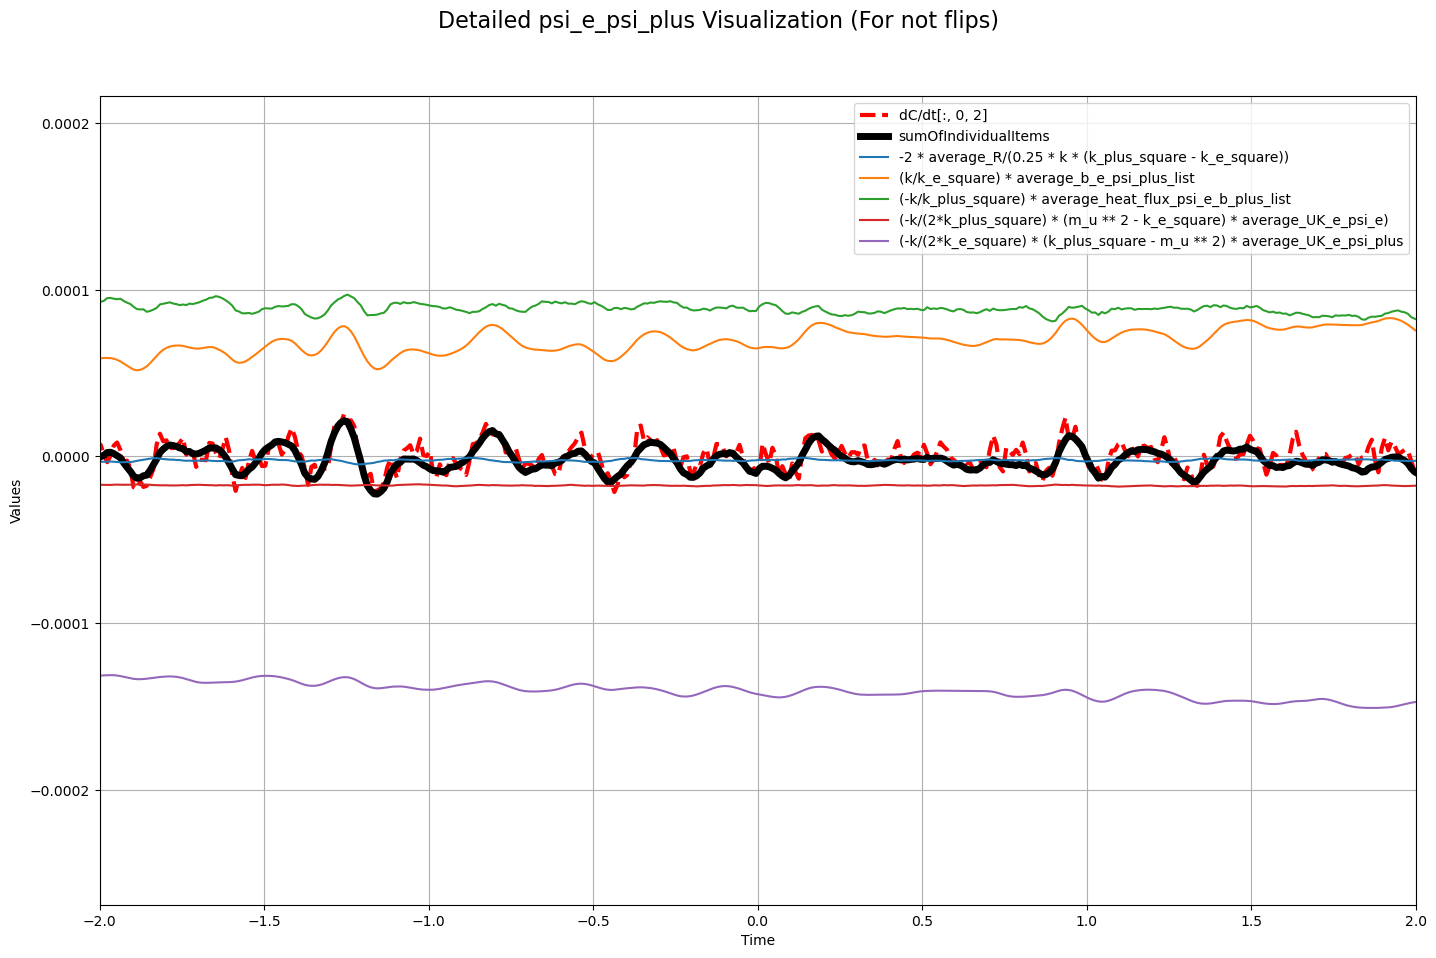

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

labels = [
    'dC/dt[:, 0, 2]',
    'sumOfIndividualItems',
    '-2 * average_R/(0.25 * k * (k_plus_square - k_e_square))',
    '(k/k_e_square) * average_b_e_psi_plus_list',
    '(-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list',
    '(-k/(2*k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e)',
    '(-k/(2*k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus'
]

sumOfIndividualItems = (-2 * average_R / (0.25 * k * (k_plus_square - k_e_square))) + \
                       ((k / k_e_square) * average_b_e_psi_plus_list) + \
                       ((-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list) + \
                       ((-k / (2 * k_plus_square) * (np.square(m_u) - k_e_square) * average_UK_e_psi_e)) + \
                       ((-k / (2 * k_e_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus))

ax.plot(time_array, dC_dt[:, 0, 2], '--r',label=labels[0], lw = 3)
ax.plot(time_array, sumOfIndividualItems,'-k',label=labels[1], lw = 5)
ax.plot(time_array, -2 * average_R / (0.25 * k * (k_plus_square - k_e_square)), label=labels[2])
# ax.plot(time_array, average_R/1000, '-b', lw = 3)
ax.plot(time_array, (k / k_e_square) * average_b_e_psi_plus_list, label=labels[3])
ax.plot(time_array, (-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list, label=labels[4])
ax.plot(time_array, -(k / (2 * k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e), label=labels[5])
ax.plot(time_array, -(k / (2 * k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus), label=labels[6])


ax.set_xlim(x_limit)
ax.grid(True)
ax.set_xlabel("Time")
ax.set_ylabel("Values")

ax.legend(loc='best')

plt.suptitle(f"Detailed psi_e_psi_plus Visualization (For not flips)", fontsize=16)

plt.tight_layout(pad=3)
plt.show()

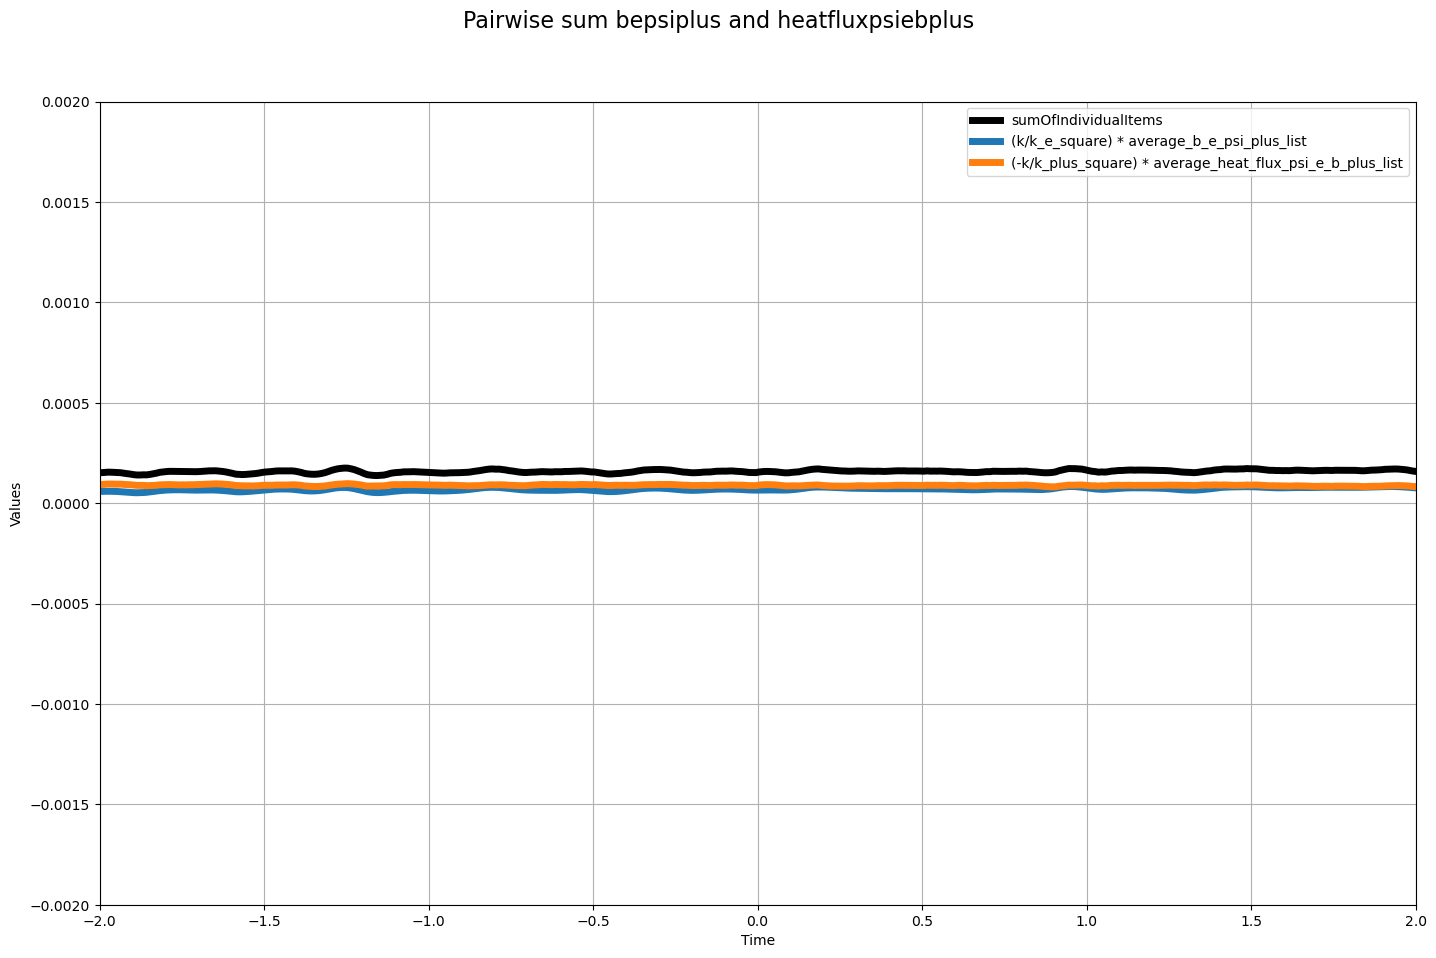

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

labels = [
    'dC/dt[:, 0, 2]',
    'sumOfIndividualItems',
    '-2 * average_R/(0.25 * k * (k_plus_square - k_e_square))',
    '(k/k_e_square) * average_b_e_psi_plus_list',
    '(-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list',
    '(-k/(2*k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e)',
    '(-k/(2*k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus'
]

sumOfIndividualItems = ((k / k_e_square) * average_b_e_psi_plus_list) + \
                       ((-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list) 
                        # ((-k / (2 * k_e_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus))

# ax.plot(time_array, dC_dt[:, 0, 2], '--r',label=labels[0], lw = 3)
ax.plot(time_array, sumOfIndividualItems,'-k',label=labels[1], lw = 5)
# ax.plot(time_array, -2 * average_R / (0.25 * k * (k_plus_square - k_e_square)), label=labels[2])
# # ax.plot(time_array, average_R/1000, '-b', lw = 3)
ax.plot(time_array, (k / k_e_square) * average_b_e_psi_plus_list, label=labels[3], lw = 5)
ax.plot(time_array, (-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list, label=labels[4], lw = 5)
# ax.plot(time_array, -(k / (2 * k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e), label=labels[5])
# ax.plot(time_array, -(k / (2 * k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus), label=labels[6])


ax.set_xlim(x_limit)
ax.set_ylim((-.002, .002))
ax.grid(True)
ax.set_xlabel("Time")
ax.set_ylabel("Values")

ax.legend(loc='best')

plt.suptitle(f"Pairwise sum bepsiplus and heatfluxpsiebplus", fontsize=16)

plt.tight_layout(pad=3)
plt.show()

#Sum of the 2 heat flux terms

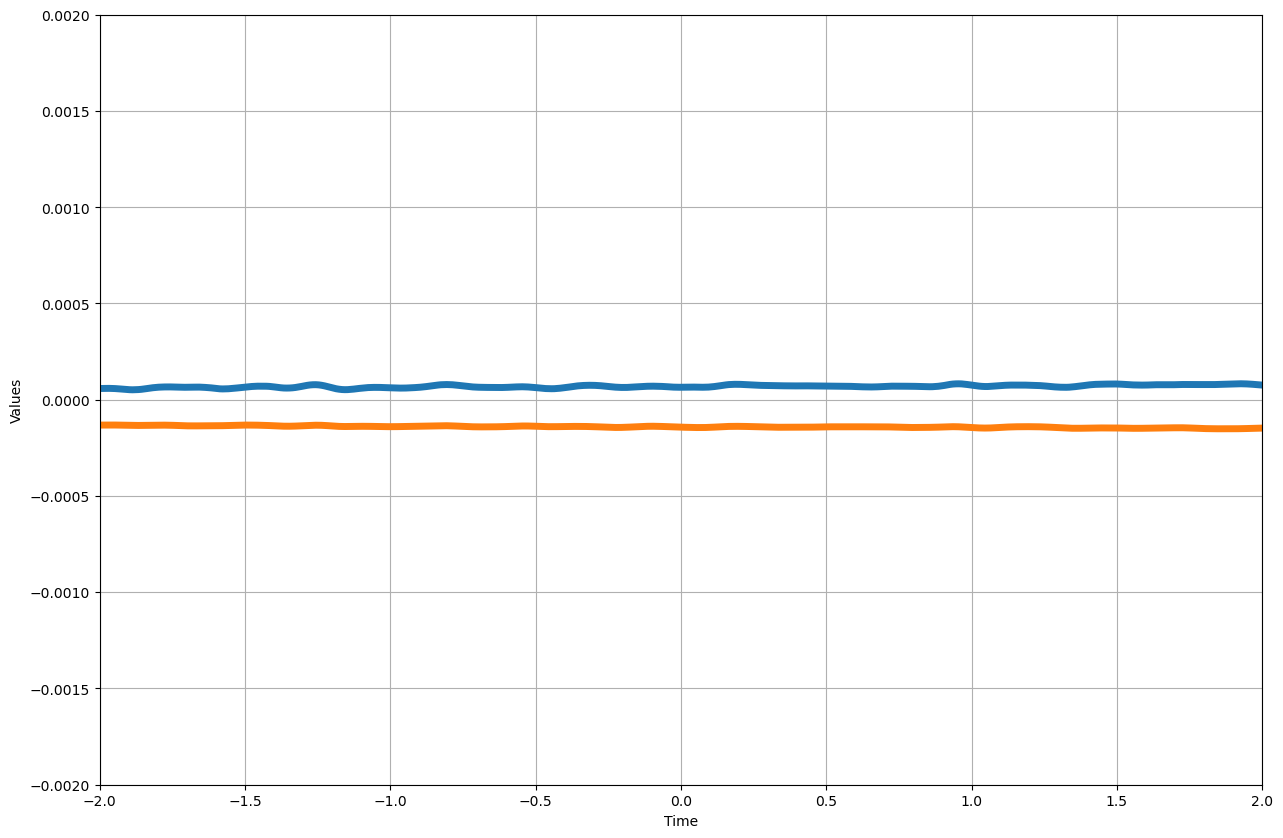

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

labels = [
    'dC/dt[:, 0, 2]',
    'sumOfIndividualItems',labels[2],
    '-2 * average_R/(0.25 * k * (k_plus_square - k_e_square))',
    '(k/k_e_square) * average_b_e_psi_plus_list',
    '(-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list',
    '(-k/(2*k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e)',
    '(-k/(2*k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus'
]

ax.plot(time_array, ((k / k_e_square) * average_b_e_psi_plus_list),label=labels[3], lw = 5)
ax.plot(time_array, (-k / (2 * k_e_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus),label=labels[6], lw = 5)
# ax.plot(time_array, -2 * average_R / (0.25 * k * (k_plus_square - k_e_square)), label=labels[2])
# # ax.plot(time_array, average_R/1000, '-b', lw = 3)
# ax.plot(time_array, (k / k_e_square) * average_b_e_psi_plus_list, label=labels[3])
# ax.plot(time_array, (-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list, label=labels[4])
# ax.plot(time_array, -(k / (2 * k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e), label=labels[5])
# ax.plot(time_array, -(k / (2 * k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus), label=labels[6])


ax.set_xlim(x_limit)
ax.set_ylim((-.002, .002))
ax.grid(True)
ax.set_xlabel("Time")
ax.set_ylabel("Values")
labels[2]
plt.show()

#Sum of the b_e_psi_plus + kinetic energy of exicted wave

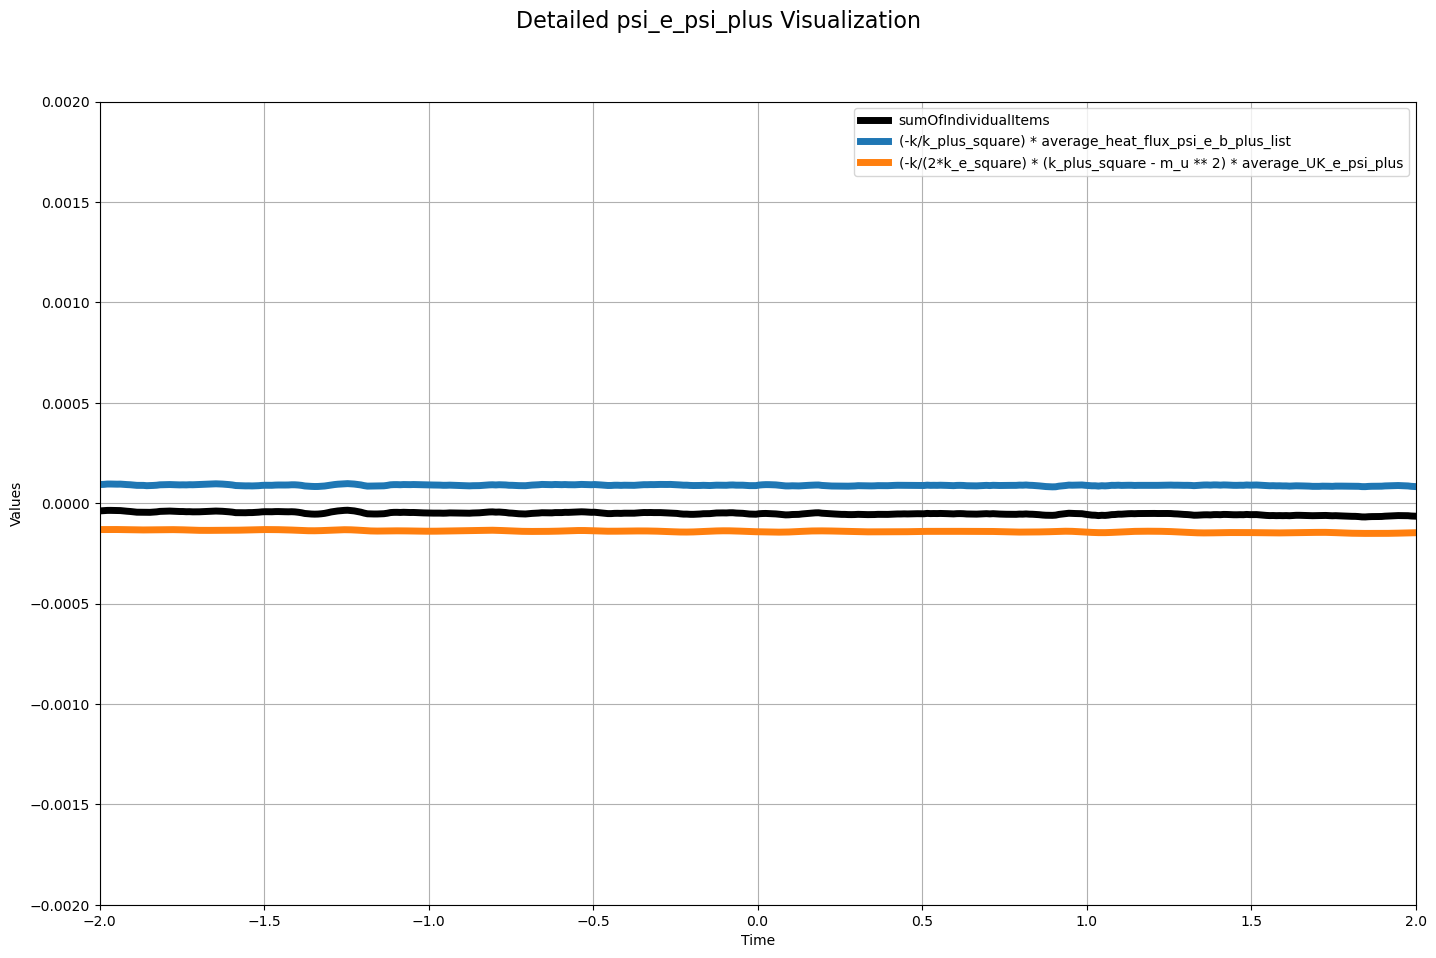

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

labels = [
    'dC/dt[:, 0, 2]',
    'sumOfIndividualItems',
    '-2 * average_R/(0.25 * k * (k_plus_square - k_e_square))',
    '(k/k_e_square) * average_b_e_psi_plus_list',
    '(-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list',
    '(-k/(2*k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e)',
    '(-k/(2*k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus'
]

sumOfIndividualItems = -(k / (2 * k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus) + \
                       ((-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list)
                        # ((-k / (2 * k_e_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus))

# ax.plot(time_array, dC_dt[:, 0, 2], '--r',label=labels[0], lw = 3)
ax.plot(time_array, sumOfIndividualItems,'-k',label=labels[1], lw = 5)
# ax.plot(time_array, -2 * average_R / (0.25 * k * (k_plus_square - k_e_square)), label=labels[2])
# # ax.plot(time_array, average_R/1000, '-b', lw = 3)
# ax.plot(time_array, (k / k_e_square) * average_b_e_psi_plus_list, label=labels[3])
ax.plot(time_array, (-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list, label=labels[4], lw = 5)
# ax.plot(time_array, -(k / (2 * k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e), label=labels[5])
ax.plot(time_array, -(k / (2 * k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus), label=labels[6], lw = 5)


ax.set_xlim(x_limit)
ax.set_ylim((-.002, .002))
ax.grid(True)
ax.set_xlabel("Time")
ax.set_ylabel("Values")

ax.legend(loc='best')

plt.suptitle(f"Detailed psi_e_psi_plus Visualization", fontsize=16)

plt.tight_layout(pad=3)
plt.show()

#Sum of kepsi plus and psiebplus

In [ ]:
def std_across_axis(arrays):
    """
    Calculate the standard deviation across axis 1 for a list or array of 2D numpy arrays.
    Returns a single array of standard deviations for each array in the input.
    
    Parameters:
        arrays (array-like): List or array of shape (N, M) or (N, M, ...) where N is the number of arrays.
        
    Returns:
        np.ndarray: Array of standard deviations, shape (N,).
    """
    # arrays = np.asarray(arrays)
    return np.std(arrays, axis=0)

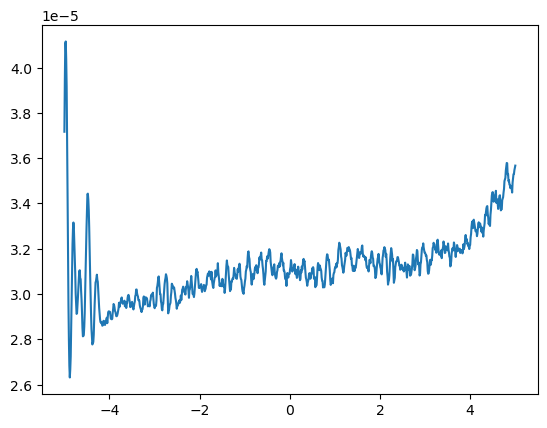

In [ ]:
plt.plot(time_array, average_U * average_k_e_psi_e_list)

In [ ]:
U_k_e_psi_e = np.array([
    np.array(u) * np.array(k)
    for u, k in zip(df['u_list'], df['k_e_psi_e_list'])
])

U_k_e_psi_e_stdev = std_across_axis(U_k_e_psi_e)

In [ ]:
U_k_e_psi_e_average = average_arrays(*list(U_k_e_psi_e))

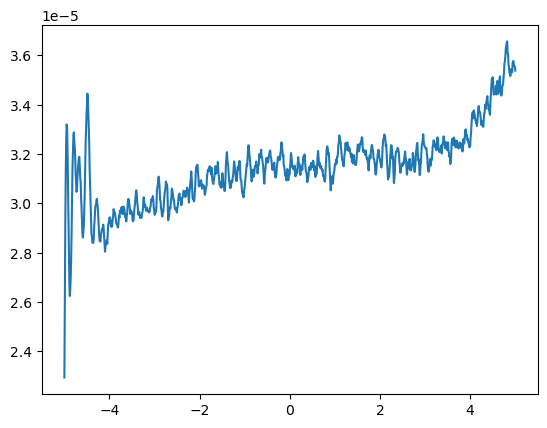

In [ ]:
plt.plot(time_array, U_k_e_psi_e_average)

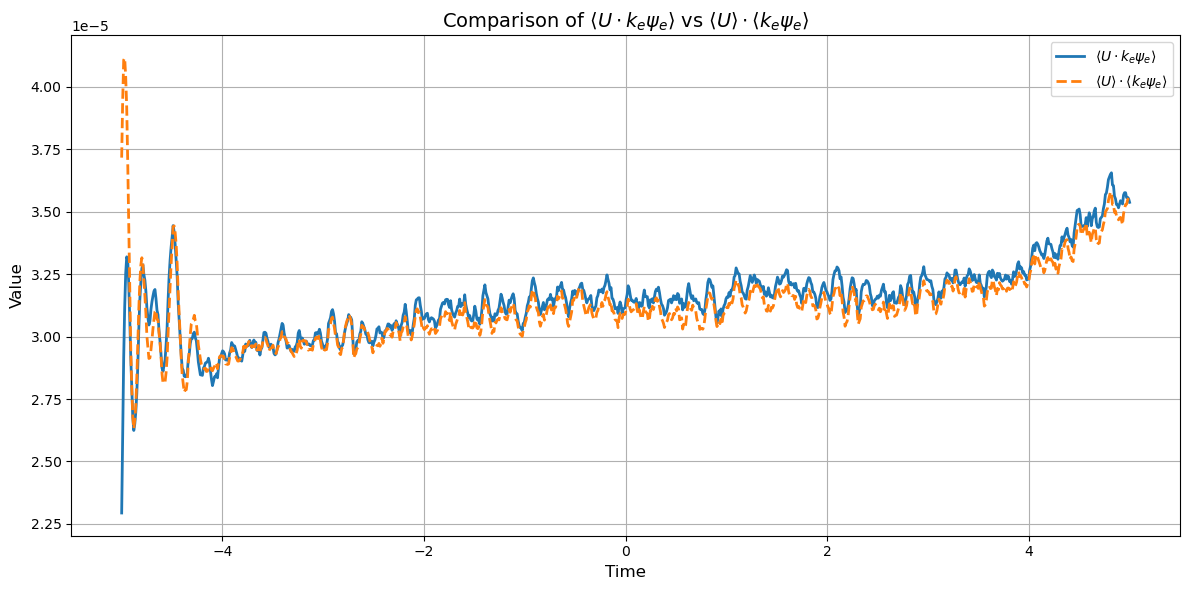

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(time_array, U_k_e_psi_e_average, label=r'$\langle U \cdot k_{e}\psi_{e} \rangle$', linewidth=2)
ax.plot(time_array, average_U * average_k_e_psi_e_list, 
        label=r'$\langle U \rangle \cdot \langle k_{e}\psi_{e} \rangle$', linestyle='--', linewidth=2)

ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title(r'Comparison of $\langle U \cdot k_{e}\psi_{e} \rangle$ vs $\langle U \rangle \cdot \langle k_{e}\psi_{e} \rangle$', fontsize=14)
ax.legend(fontsize=10)
ax.grid(True)

plt.tight_layout()
plt.show()


#### Bootstrapping


In [ ]:
len(average_U)

1000

In [ ]:
avg_U_1 = df['u_list'].iloc[:len(df['u_list'])//2]
avg_U_1 = average_arrays(*list(avg_U_1))
avg_U_2 = df['u_list'].iloc[len(df['u_list'])//2:]
avg_U_2 = average_arrays(*list(avg_U_2))

average_k_e_psi_e_list_1 = df['k_e_psi_e_list'].iloc[len(df['k_e_psi_e_list'])//2:]
average_k_e_psi_e_list_1 = average_arrays(*average_k_e_psi_e_list_1)
average_k_e_psi_e_list_2 = df['k_e_psi_e_list'].iloc[:len(df['k_e_psi_e_list'])//2]
average_k_e_psi_e_list_2 = average_arrays(*average_k_e_psi_e_list_2)


U_k_e_psi_e_1 = np.array([
    np.array(u) * np.array(k)
    for u, k in zip(df['u_list'].iloc[:len(df['u_list'])//2], df['k_e_psi_e_list'].iloc[:len(df['u_list'])//2])
])

U_k_e_psi_e_2 = np.array([
    np.array(u) * np.array(k)
    for u, k in zip(df['u_list'].iloc[len(df['u_list'])//2:], df['k_e_psi_e_list'].iloc[len(df['u_list'])//2:])
])

U_k_e_psi_e_average_1 = average_arrays(*list(U_k_e_psi_e_1))
U_k_e_psi_e_average_2 = average_arrays(*list(U_k_e_psi_e_2))

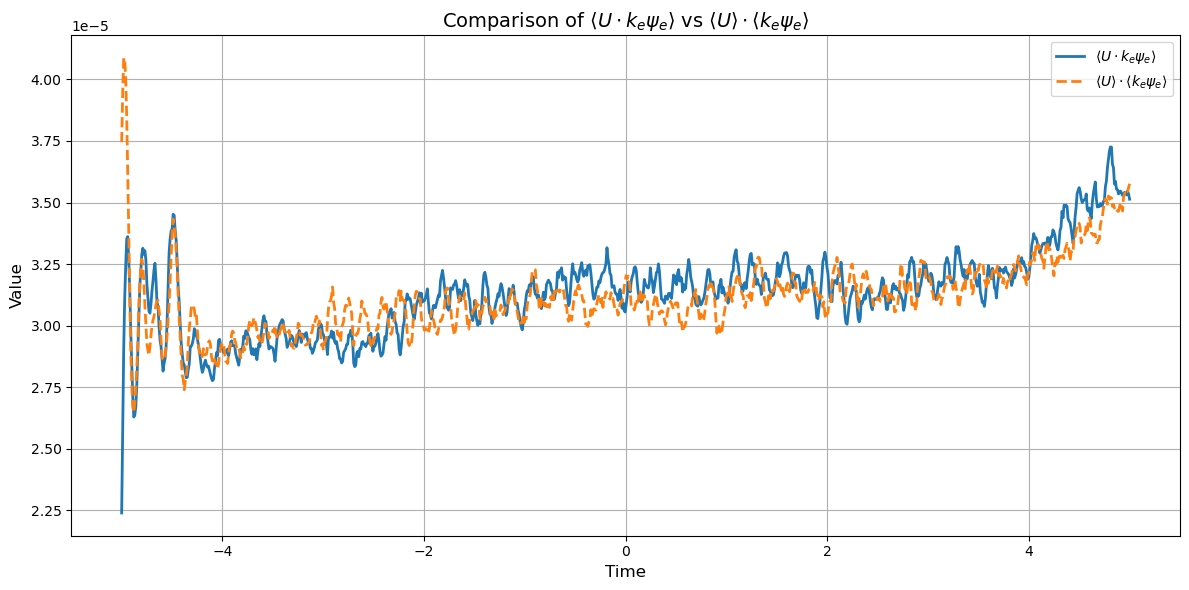

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(time_array, U_k_e_psi_e_average_1, label=r'$\langle U \cdot k_{e}\psi_{e} \rangle$', linewidth=2)
ax.plot(time_array, avg_U_1 * average_k_e_psi_e_list_1, 
        label=r'$\langle U \rangle \cdot \langle k_{e}\psi_{e} \rangle$', linestyle='--', linewidth=2)

ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title(r'Comparison of $\langle U \cdot k_{e}\psi_{e} \rangle$ vs $\langle U \rangle \cdot \langle k_{e}\psi_{e} \rangle$', fontsize=14)
ax.legend(fontsize=10)
ax.grid(True)

plt.tight_layout()
plt.show()

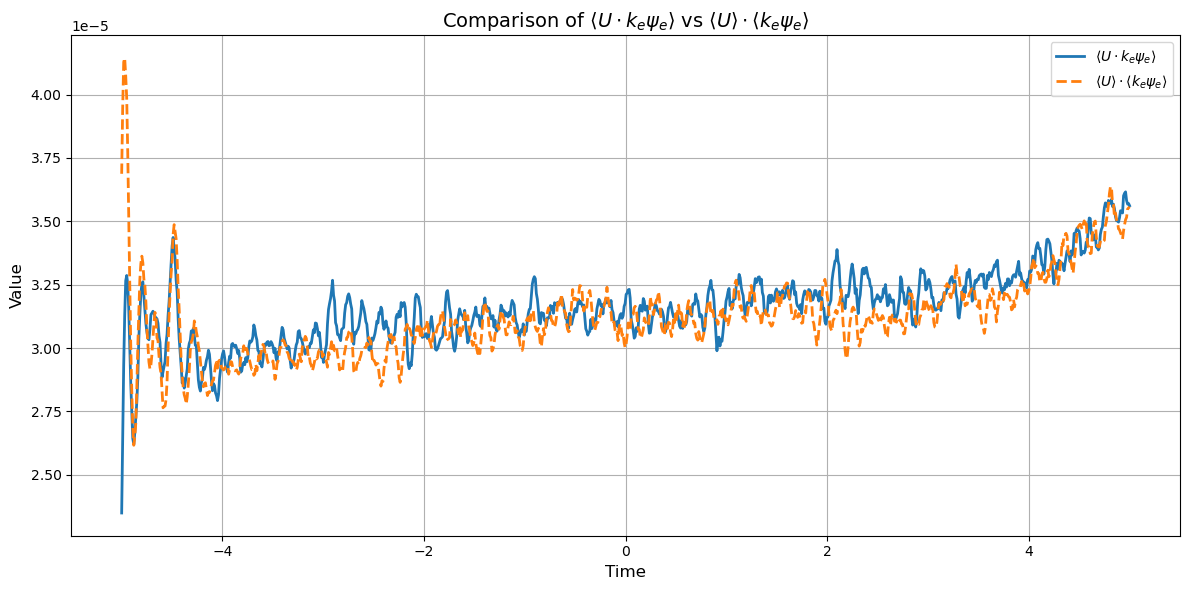

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(time_array, U_k_e_psi_e_average_2, label=r'$\langle U \cdot k_{e}\psi_{e} \rangle$', linewidth=2)
ax.plot(time_array, avg_U_2 * average_k_e_psi_e_list_2, 
        label=r'$\langle U \rangle \cdot \langle k_{e}\psi_{e} \rangle$', linestyle='--', linewidth=2)

ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title(r'Comparison of $\langle U \cdot k_{e}\psi_{e} \rangle$ vs $\langle U \rangle \cdot \langle k_{e}\psi_{e} \rangle$', fontsize=14)
ax.legend(fontsize=10)
ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
standard_error_diff= np.std(U_k_e_psi_e_average-(average_U * average_k_e_psi_e_list), axis=0) / np.sqrt(1000)

In [ ]:
standard_error_diff

2.9483065771715655e-08

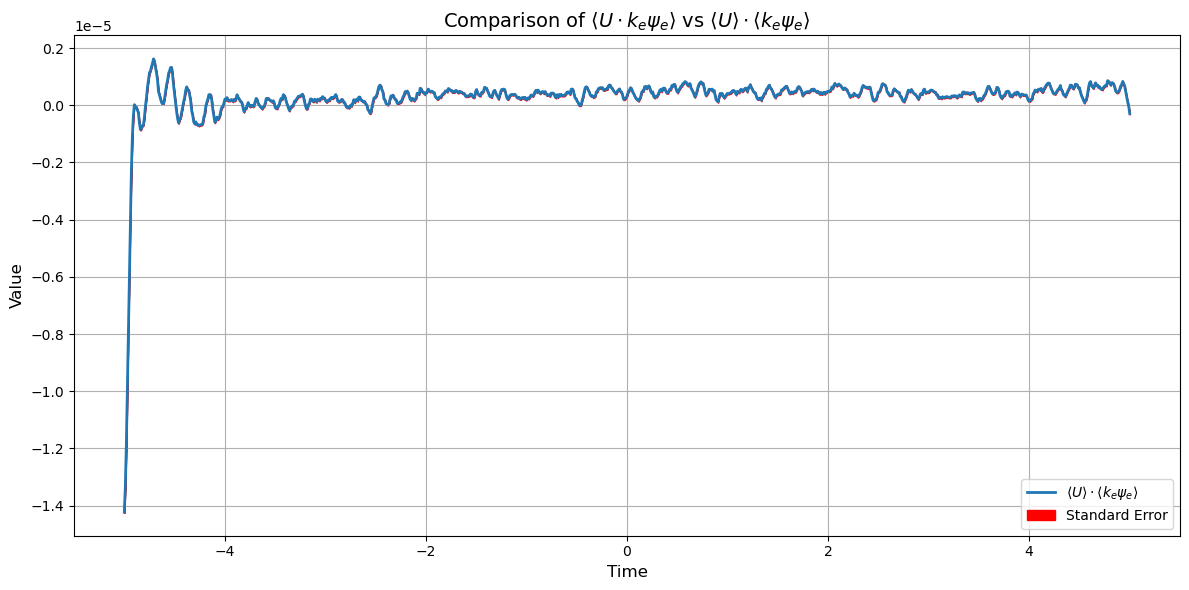

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
calc_array = U_k_e_psi_e_average-(average_U * average_k_e_psi_e_list)
# ax.plot(time_array, U_k_e_psi_e_average, label=r'$\langle U \cdot k_{e}\psi_{e} \rangle$', linewidth=2)
ax.plot(time_array, calc_array,
        label=r'$\langle U \rangle \cdot \langle k_{e}\psi_{e} \rangle$', linestyle='-', linewidth=2)

ax.fill_between(time_array, 
                calc_array - standard_error_diff, 
                calc_array + standard_error_diff, 
                alpha=1, label='Standard Error',color='red')

# ax.errorbar(time_array, 
#             U_k_e_psi_e_average - (average_U * average_k_e_psi_e_list), 
#             yerr=standard_error_diff, 
#             label=r'$\langle U \rangle \cdot \langle k_{e}\psi_{e} \rangle$', 
#             linestyle='--', 
#             linewidth=2, 
#             capsize=3)

ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title(r'Comparison of $\langle U \cdot k_{e}\psi_{e} \rangle$ vs $\langle U \rangle \cdot \langle k_{e}\psi_{e} \rangle$', fontsize=14)
ax.legend(fontsize=10)
ax.grid(True)

plt.tight_layout()
plt.show()


#### Temporal Calculations

In [ ]:
def std_across_axis(arrays):
    return np.std(arrays, axis=0)

In [ ]:
U_k_e_psi_e_stdev = std_across_axis(U_k_e_psi_e)

In [ ]:
U_k_e_psi_e_stdev.shape

(1000,)

In [ ]:
U_k_e_psi_e_stError = U_k_e_psi_e_stdev/100

In [ ]:
U_k_e_psi_e.shape

(10000, 1000)

In [ ]:
U_k_e_psi_e_average = average_arrays(*list(U_k_e_psi_e))

In [ ]:
U_k_e_psi_e_average.shape

(1000,)

In [ ]:
average_U_Ke_psi_e = average_U * average_k_e_psi_e_list
average_U_Ke_psi_e.shape

(1000,)

In [ ]:
std_U = np.std(df['u_list'].tolist(), axis=0)
std_K_e_psi_e = np.std(df['k_e_psi_e_list'].tolist(), axis=0)
std_U.shape, std_K_e_psi_e.shape

((1000,), (1000,))

In [ ]:
std_err_U = std_U / 100
std_err_k_e_psi_e = std_K_e_psi_e / 100

In [ ]:
st_err_U_K_e_psi_e = average_U * average_k_e_psi_e_list * np.sqrt((std_err_U / average_U) ** 2 + (std_err_k_e_psi_e / average_k_e_psi_e_list) ** 2)
st_err_U_K_e_psi_e.shape

(1000,)

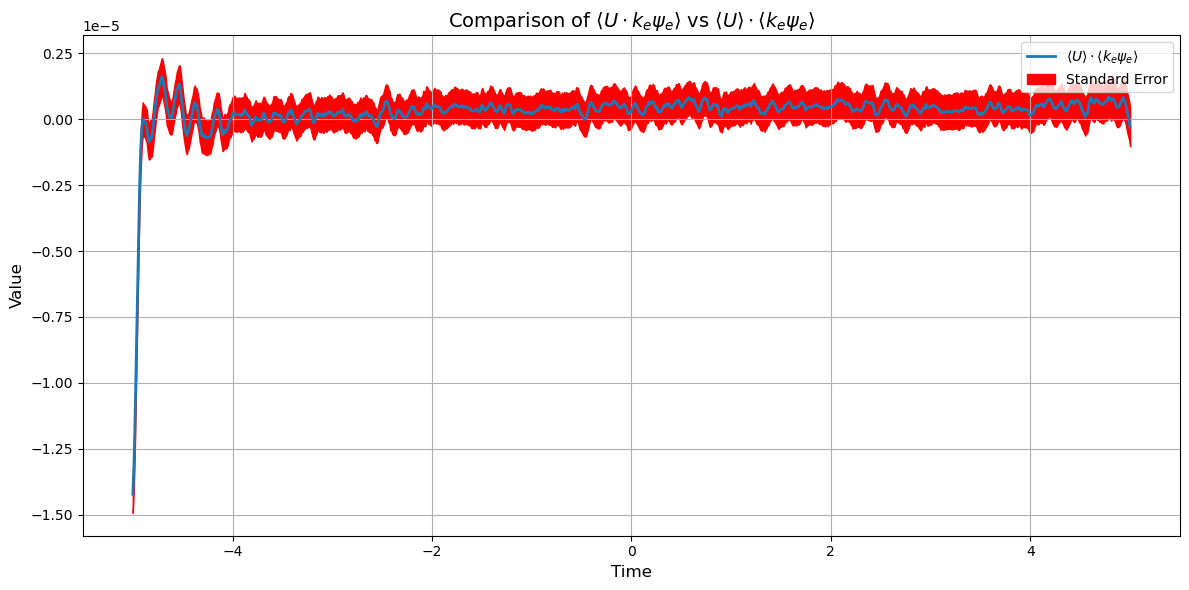

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
standard_error_diff = np.sqrt(st_err_U_K_e_psi_e ** 2 + U_k_e_psi_e_stError ** 2)
calc_array = U_k_e_psi_e_average - average_U_Ke_psi_e
# ax.plot(time_array, U_k_e_psi_e_average, label=r'$\langle U \cdot k_{e}\psi_{e} \rangle$', linewidth=2)
ax.plot(time_array, calc_array,
        label=r'$\langle U \rangle \cdot \langle k_{e}\psi_{e} \rangle$', linestyle='-', linewidth=2)

ax.fill_between(time_array, 
                calc_array - standard_error_diff, 
                calc_array + standard_error_diff, 
                alpha=1, label='Standard Error',color='red')

# ax.errorbar(time_array, 
#             U_k_e_psi_e_average - (average_U * average_k_e_psi_e_list), 
#             yerr=standard_error_diff, 
#             label=r'$\langle U \rangle \cdot \langle k_{e}\psi_{e} \rangle$', 
#             linestyle='--', 
#             linewidth=2, 
#             capsize=3)

ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title(r'Comparison of $\langle U \cdot k_{e}\psi_{e} \rangle$ vs $\langle U \rangle \cdot \langle k_{e}\psi_{e} \rangle$', fontsize=14)
ax.legend(fontsize=10)
ax.grid(True)

plt.tight_layout()
plt.show()
